<a href="https://colab.research.google.com/github/JuliaHdzQ/APRENDIZAJE_AUTOMATICO_23_24/blob/main/LAB03_GrupoA03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 3**


> GRUPO A03



>Lucia Valdera Gayoso, Susana Villar Polvorosa, Julia Hernández Quintas, Pablo Mendieta Ruiz

> ## Práctica 1 (Investigación en cáncer de mama)

En esta primera práctica, vamos a trabajar con un dataset que contiene características de tumores de cáncer de mama.

Vamos a estudiar y analizar este dataset, para finalmente poder extraer conclusiones sobre que características influyen más en el diagnóstico.

> ##### Selección de los datos

Tenemos ya elegida nuestra base de datos, procedemos a subirla y cargarla:

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Especicicamos la ruta del archivo CSV en Google Drive
ruta_archivo_drive = '/content/drive/MyDrive/cancer.csv'

# Cargamos el archivo CSV en un DataFrame de pandas
data_cancer = pd.read_csv(ruta_archivo_drive)

# Mostramos el Dataframe, verificando que los datos se han cargado correctamente
data_cancer.head()

Mounted at /content/drive


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

> ##### Preprocesamiento de datos


Vamos a comenzar haciendo un análisis de nuestra Base de Datos, tratando de comprenderla en profundidad, no solo técnicamente, sino también en su dominio.



In [2]:
data_cancer.shape

(569, 33)

Contamos con 33 características distintas registradas sobre 569 tumores.

In [3]:
data_cancer.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

Veamos cada una de las variables, así como el tipo de datos y los valores no nulos que contienen:

In [4]:
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Observamos que realmente contamos con 10 características, de las cuales  tenemos la media, el error estándar, y el peor valor. Sabiendo esto, vamos a investigar que nos esta diciendo cada una de estas 10 características.

Además vemos que la primera variable es el id, y la segunda es la más importante, pues nos da el **diagnóstico**, es decir nos dice si el tumor es maligno M, o benigno B

También hemos visto que la última columnas no tiene ningun valor no nulo, por lo que consideramos apropiado eliminarla directamente, pues no nos está dando ningun tipo de información.


1. ID number
2. Diagnosis (M = malignant, B = benign)
3. radius (media de las distancias desde el centro a los puntos del perímetro)
4. texture (desviación estándar de los valores de escala de grises)
5. perimeter
6. area
7. smoothness (variación local en longitudes de radio)
8. compactness (perimetro^2 / área - 1.0)
9. concavity (severidad de las porciones cóncavas del contorno)
10. concave points (número de porciones cóncavas en el contorno)
11. symmetry
12. fractal dimension ("coastline approximation" - 1)

In [5]:
# Eliminamos la última columna
data_cancer = data_cancer.drop(data_cancer.columns[-1], axis=1)
data_cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Vamos a mostrar gráficamente nuestra variable diagnóstico, como bien decíamos es la más importante, y con este gráfico de barras pretendemos hacernos una idea de cuantos tumores son malignos, y cuántos benignos de entre los que estamos analizando.

Lo ideal, ya que a posteriori pretendemos hacer un modelo de clasficación, es que ambas clases estén lo más equilibradas posibles, es decir que haya un número similiar de tumores benignos y malignos.

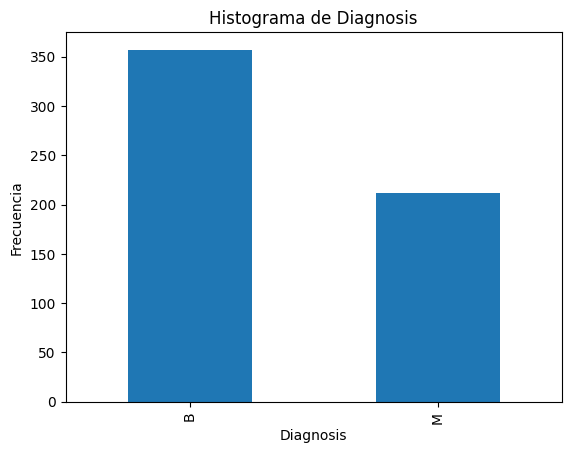

In [6]:
import matplotlib.pyplot as plt

# Mostrar histograma de la variable diagnosis
data_cancer['diagnosis'].value_counts().plot(kind='bar')
plt.title('Histograma de Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frecuencia')
plt.show()


In [7]:
data_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Efectivamente, existe un desequilibrio en el número de muestras de cada variable, y para evitar problemas futuros que puedan aparecer, vamos a equilibrar las muestras, utilizando un algoritmo de sobremuestreo (oversampling).

Para ello vamos a usar la técina SMOTE (Synthetic Minority Over-sampling Technique) en la que:

1 Se identifican las observaciones de la clase minoritaria.


2 Para cada una de ellas, se identifican los k vecinos más
cercanos (distancia euclídea).


3 Se calculan los puntos medios entre vectores de características
y se multiplica por un valor aleatorio entre 0 y 1. Se añade la
observación resultante a la clase minoritaria.


In [8]:
from imblearn.over_sampling import SMOTE

# Separamos características y variable objetivo
X = data_cancer.drop('diagnosis', axis=1)
y = data_cancer['diagnosis']

# Creamos una instancia de SMOTE
smote = SMOTE(random_state = 42)

# Aplicamos SMOTE para generar nuevas muestras
X_smote, y_smote = smote.fit_resample(X, y)

# Finalmente creamos un DataFrame con las nuevas muestras
y_smote.value_counts()

diagnosis
M    357
B    357
Name: count, dtype: int64

In [9]:
data_smote = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote, columns=['diagnosis'])], axis=1)
data_smote.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.4601                  0.11890          M  
1          0.2750                  0.08902          M  
2          0.3613                  0.08758          M  
3          0.6638                  0.17300          M  
4          0.2364                  0.07678          M  

[5 rows x 32 columns]

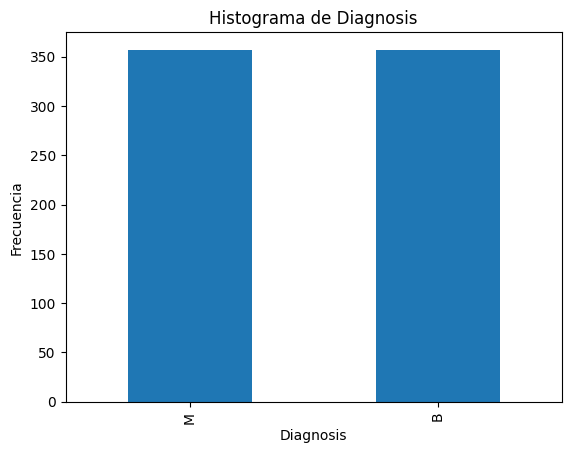

In [10]:
# Mostrar histograma de la variable diagnosis equilibrada
data_smote['diagnosis'].value_counts().plot(kind='bar')
plt.title('Histograma de Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frecuencia')
plt.show()

El siguiente paso va a ser evaluar los **outliers**, para ello utilizaremos los diagramas de bigotes o boxplots, y con ellos analizaremos si existen valores fuera de rango en alguna de nuestras variables, y de ser así consideraremos si debemos o no eliminarlas:

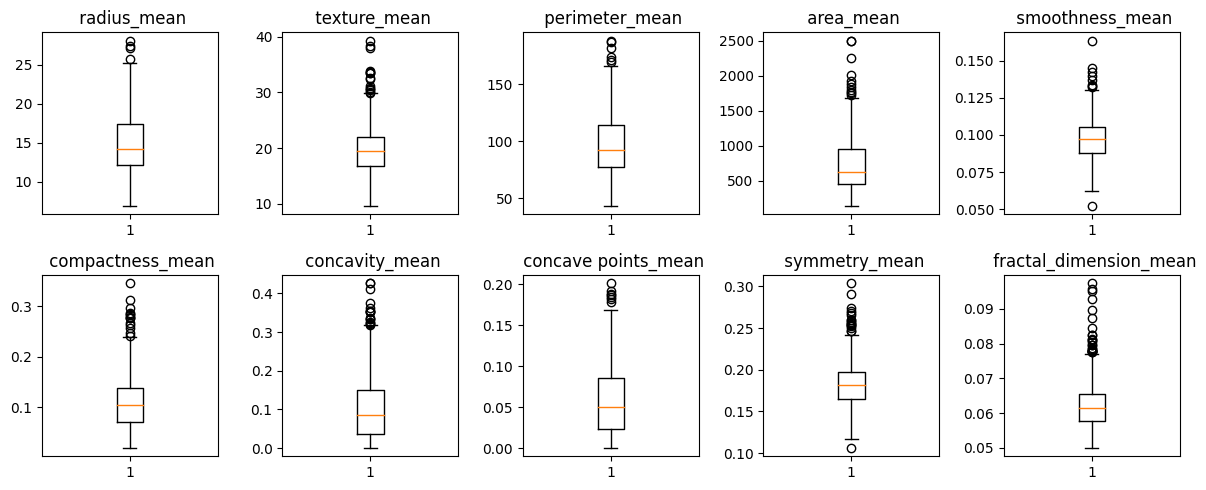

In [11]:
import matplotlib.pyplot as plt

# Creamos la figura con subplots para los 10 diagramas de bigotes
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

# Guardamos las variables
variables = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
             'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Creamos los boxplots para cada variable
for i, variable in enumerate(variables):
    axes[i].boxplot(data_smote[variable])
    axes[i].set_title(f' {variable}')

plt.tight_layout()
# Mostramos la figura
plt.show()


Al evaluar los valores atípicos, en las medidas de cada una de las características, podemos comprobar que estos son numerosos, y que todos ellos son valores atípicamente altos.

Tratando de entender la utilidad de estos valores, creemos que no debemos eliminarlos, ya que pueden ser precisamente esos valores demasiado grandes, los que coincidan con el diagnóstico de tumor maligno. Lo comprobaremos más adelante.

Vamos, por último a evaluar la **correlación entre nuestras variables**, para considerar si algunas de ellas estan demasiado correlacionadas, es decir nos aportan casi la misma información, y nos conviene eliminarlas, evitando tratar con demasiados datos, de forma innecesaria.

Primero, vamos a comparar si hay mucha correlación entre la media, error estandar, y peor caso, de cada característica. De ser así, podríamos quedarnos solo con las media de cada característica, y evaluar también la correlación entre ellas.

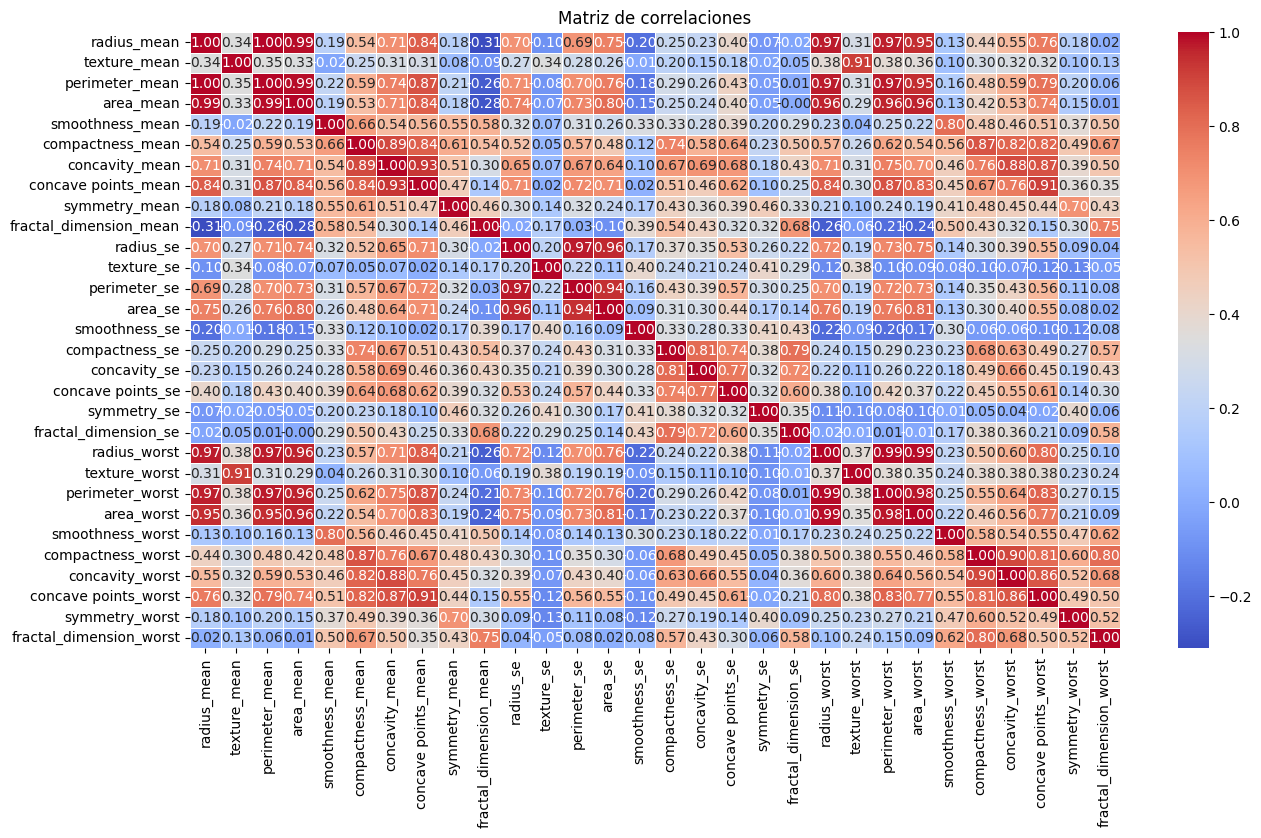

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean',
        'concavity_mean', 'concave points_mean', 'symmetry_mean',
        'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
        'area_se', 'smoothness_se', 'compactness_se',
        'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
        'area_worst', 'smoothness_worst', 'compactness_worst',
        'concavity_worst', 'concave points_worst', 'symmetry_worst',
        'fractal_dimension_worst']

# matriz de correlaciones
correlation_matrix = data_smote[cols].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlaciones')
plt.show()

**Correlación entre las dististans medidas de las variables**

En la matriz de correlación, puede observarse como la correlación entre las variables en media, y en peor caso, son todas superiores a 0.70, algunas con valores cercanos al 1.

A pesar de ello, vamos a considerar no eliminar dichas variables, ya que teniendo en cuenta el dominio de nuestro problema, consideramos importante mantener los peores valores, ya que esos pueden ser determinantes, para determinar si el tumor es o no maligno.

En cuanto al error medio, aunque también existe correlación con las demas medidas, esta es mucho menor, con valores que rondan el 0.30 en algunas de ellas. Es por eso, que estas variables si las mantendremos, pues el error medio no deja de definirnos la variabilidad de la característica, por lo que eliminarla puede suponer una perdida de información valiosa.

In [13]:
# # Guardamos las variables
# variables = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
#              'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# # Eliminamos las columnas en la lista 'variables' de la base de datos
# data_smote_sin_variables = data_smote.drop(columns=variables)
# data_smote = data_smote.drop(columns=variables)

Mostramos la matriz de correlaciones, entre variables, para una misma medida:

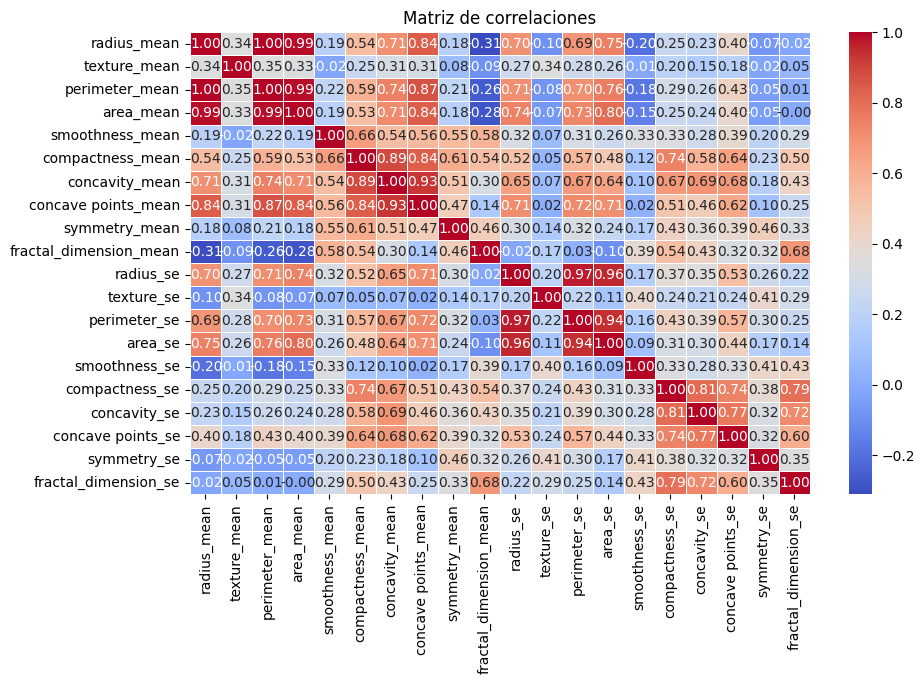

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean',
        'concavity_mean', 'concave points_mean', 'symmetry_mean',
        'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
        'area_se', 'smoothness_se', 'compactness_se',
        'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se']

# matriz de correlaciones
correlation_matrix = data_smote[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlaciones')
plt.show()

**Correlación entre las variables que representan distintas características**

De forma evidente, vemos como la correlación entre radio y perímetro, es de un 100% de la misma manera que la correlación entre estas con área es casi perfecta. Por ello nos quedaremos de entre estas tres variables solo con el área.

También existe una alta correlacion entre el número de concavidades del contorno, y la severidad de las porciones cóncavas, que supera el 90%, por lo que nos quedamos solo con la primera.

El resto de correlaciones, no las consideramos tan significativas, como para prescindir de alguna de las variables.

In [15]:
data_smote = data_smote.drop(['perimeter_mean', 'radius_mean', 'concave points_mean', 'perimeter_se', 'radius_se', 'concave points_se'], axis=1)

**Transformación a categóricas con 3 valores**


Como último paso en el preprocesamiento, convertiremos a categórica la variable que guarda los valores del área del tumor. Para ello, vamos a ver como se distribuye graficamente:

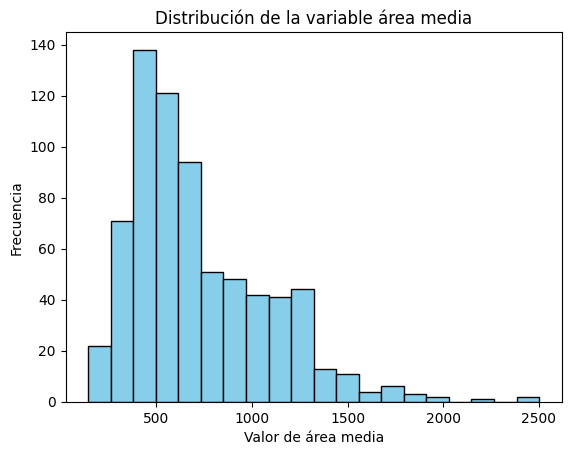

In [16]:
import matplotlib.pyplot as plt

# Histograma de la variable 'area_mean'
plt.hist(data_smote['area_mean'], bins=20, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Valor de área media')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable área media')

# Mostrar el histograma
plt.show()

Visto esto, creamos 3 categorías, con valores pequeños, medios y grandes, del area:

In [17]:
import pandas as pd

# Define los límites para las categorías
bins = [-float('inf'), 550, 1500, float('inf')]

etiquetas = [1, 2, 3]
data_smote['area_mean_discreta'] = pd.cut(data_smote['area_mean'], bins=bins, labels=[1, 2, 3])

print(data_smote[['area_mean', 'area_mean_discreta']].head())

   area_mean area_mean_discreta
0     1001.0                  2
1     1326.0                  2
2     1203.0                  2
3      386.1                  1
4     1297.0                  2


In [18]:
# Eliminamos la variable continua del área:
data_smote = data_smote.drop(['area_mean'], axis=1)

La base de datos, ya esta lista para empezar a trabajar con ella. Antes de hacerlo, vamos a sacar 5 instancias de los datos totalmente aleatorias, manejaremos nuestra base sin ellas.

Esto lo hacemos para al final del proyecto, poder tomar 5 muestras de tumores, y poder evaluarlos, sin que hayan sido nunca vistos por ninguno de nuestros modelos.

La idea es emplear cinco casos de tumores reales, pero los tomamos de esta base, puesto que continenen todas las variables que necesitamos para evaluar si es benigno o no, entre ellas la etiqueta real, pudiendo verificar si el modelo es bueno.

In [19]:
#Cogemos 5 filas totalmente aleatorias:
filas_aleatorias = data_smote.sample(n=5, random_state=32)
data_smote = data_smote.drop(filas_aleatorias.index)

print(data_smote.shape)
print(filas_aleatorias.shape)

(709, 26)
(5, 26)


La *BASE DE DATOS FINAL*, es decir sobre la que aplicaremos nuestro modelo de clasificación, será finalmente:

In [20]:
data_smote.head()


id  texture_mean  smoothness_mean  compactness_mean  concavity_mean  \
0    842302         10.38          0.11840           0.27760          0.3001   
1    842517         17.77          0.08474           0.07864          0.0869   
2  84300903         21.25          0.10960           0.15990          0.1974   
3  84348301         20.38          0.14250           0.28390          0.2414   
4  84358402         14.34          0.10030           0.13280          0.1980   

   symmetry_mean  fractal_dimension_mean  texture_se  area_se  smoothness_se  \
0         0.2419                 0.07871      0.9053   153.40       0.006399   
1         0.1812                 0.05667      0.7339    74.08       0.005225   
2         0.2069                 0.05999      0.7869    94.03       0.006150   
3         0.2597                 0.09744      1.1560    27.23       0.009110   
4         0.1809                 0.05883      0.7813    94.44       0.011490   

   ...  perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0  ...           184.60      2019.0            0.1622             0.6656   
1  ...           158.80      1956.0            0.1238             0.1866   
2  ...           152.50      1709.0            0.1444             0.4245   
3  ...            98.87       567.7            0.2098             0.8663   
4  ...           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  diagnosis  area_mean_discreta  
0                  0.11890          M                   2  
1                  0.08902          M                   2  
2                  0.08758          M                   2  
3                  0.17300          M                   1  
4                  0.07678          M                   2  

[5 rows x 26 columns]

> ##### MODELO

A continuación llevamos a cabo la creación de dos modelos de clasificación, concretamente arboles de decisión.

En este caso, realizaremos dos modelos distintos de arboles de decisión, en los que modificaremos la medida de desorden.

Esta representa la distribución de probabilidad que tiene un atributo, y se relaciona con la homogeneidad.

Lo que buscamos con estos modelos, es dividir los datos de forma que cada camino termine siendo lo mas homogeneo posible.

Esa homogeneidad nos la dan las distintas medidas de dispersión.

**MODELO 1 (GINNI)**: Para este primer modelo usaremos GINNI:  

En este caso se divide un nodo p, en k particiones, y se calcula la calidad de cada partición, siguiendo la formula:

$$
Gini = 1 - \sum_{i=1}^{n} (p_i)^2
$$


In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

data_cols = ['texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',
       'area_mean_discreta']


X = data_smote[data_cols]
y = data_smote['diagnosis']  # Variable que queremos clasificar

# Dividimos el DataSet en entrenamiento 70 % y test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# reamos nuestro arbol de decisión
clf_gini = DecisionTreeClassifier(criterion='gini')

# Entrenamos el arbol de decisión
clf_gini = clf_gini.fit(X_train,y_train)

# Hacemos las predicciones, para nuetros datos de test.
y_pred = clf_gini.predict(X_test)

# Finalmente, valoramos la precisión del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Error:",1 - metrics.accuracy_score(y_test, y_pred))

print("Clase negativa:", clf_gini.classes_[0])
print("Clase positiva:", clf_gini.classes_[1])

Accuracy: 0.9624413145539906
Error: 0.03755868544600938
Clase negativa: B
Clase positiva: M


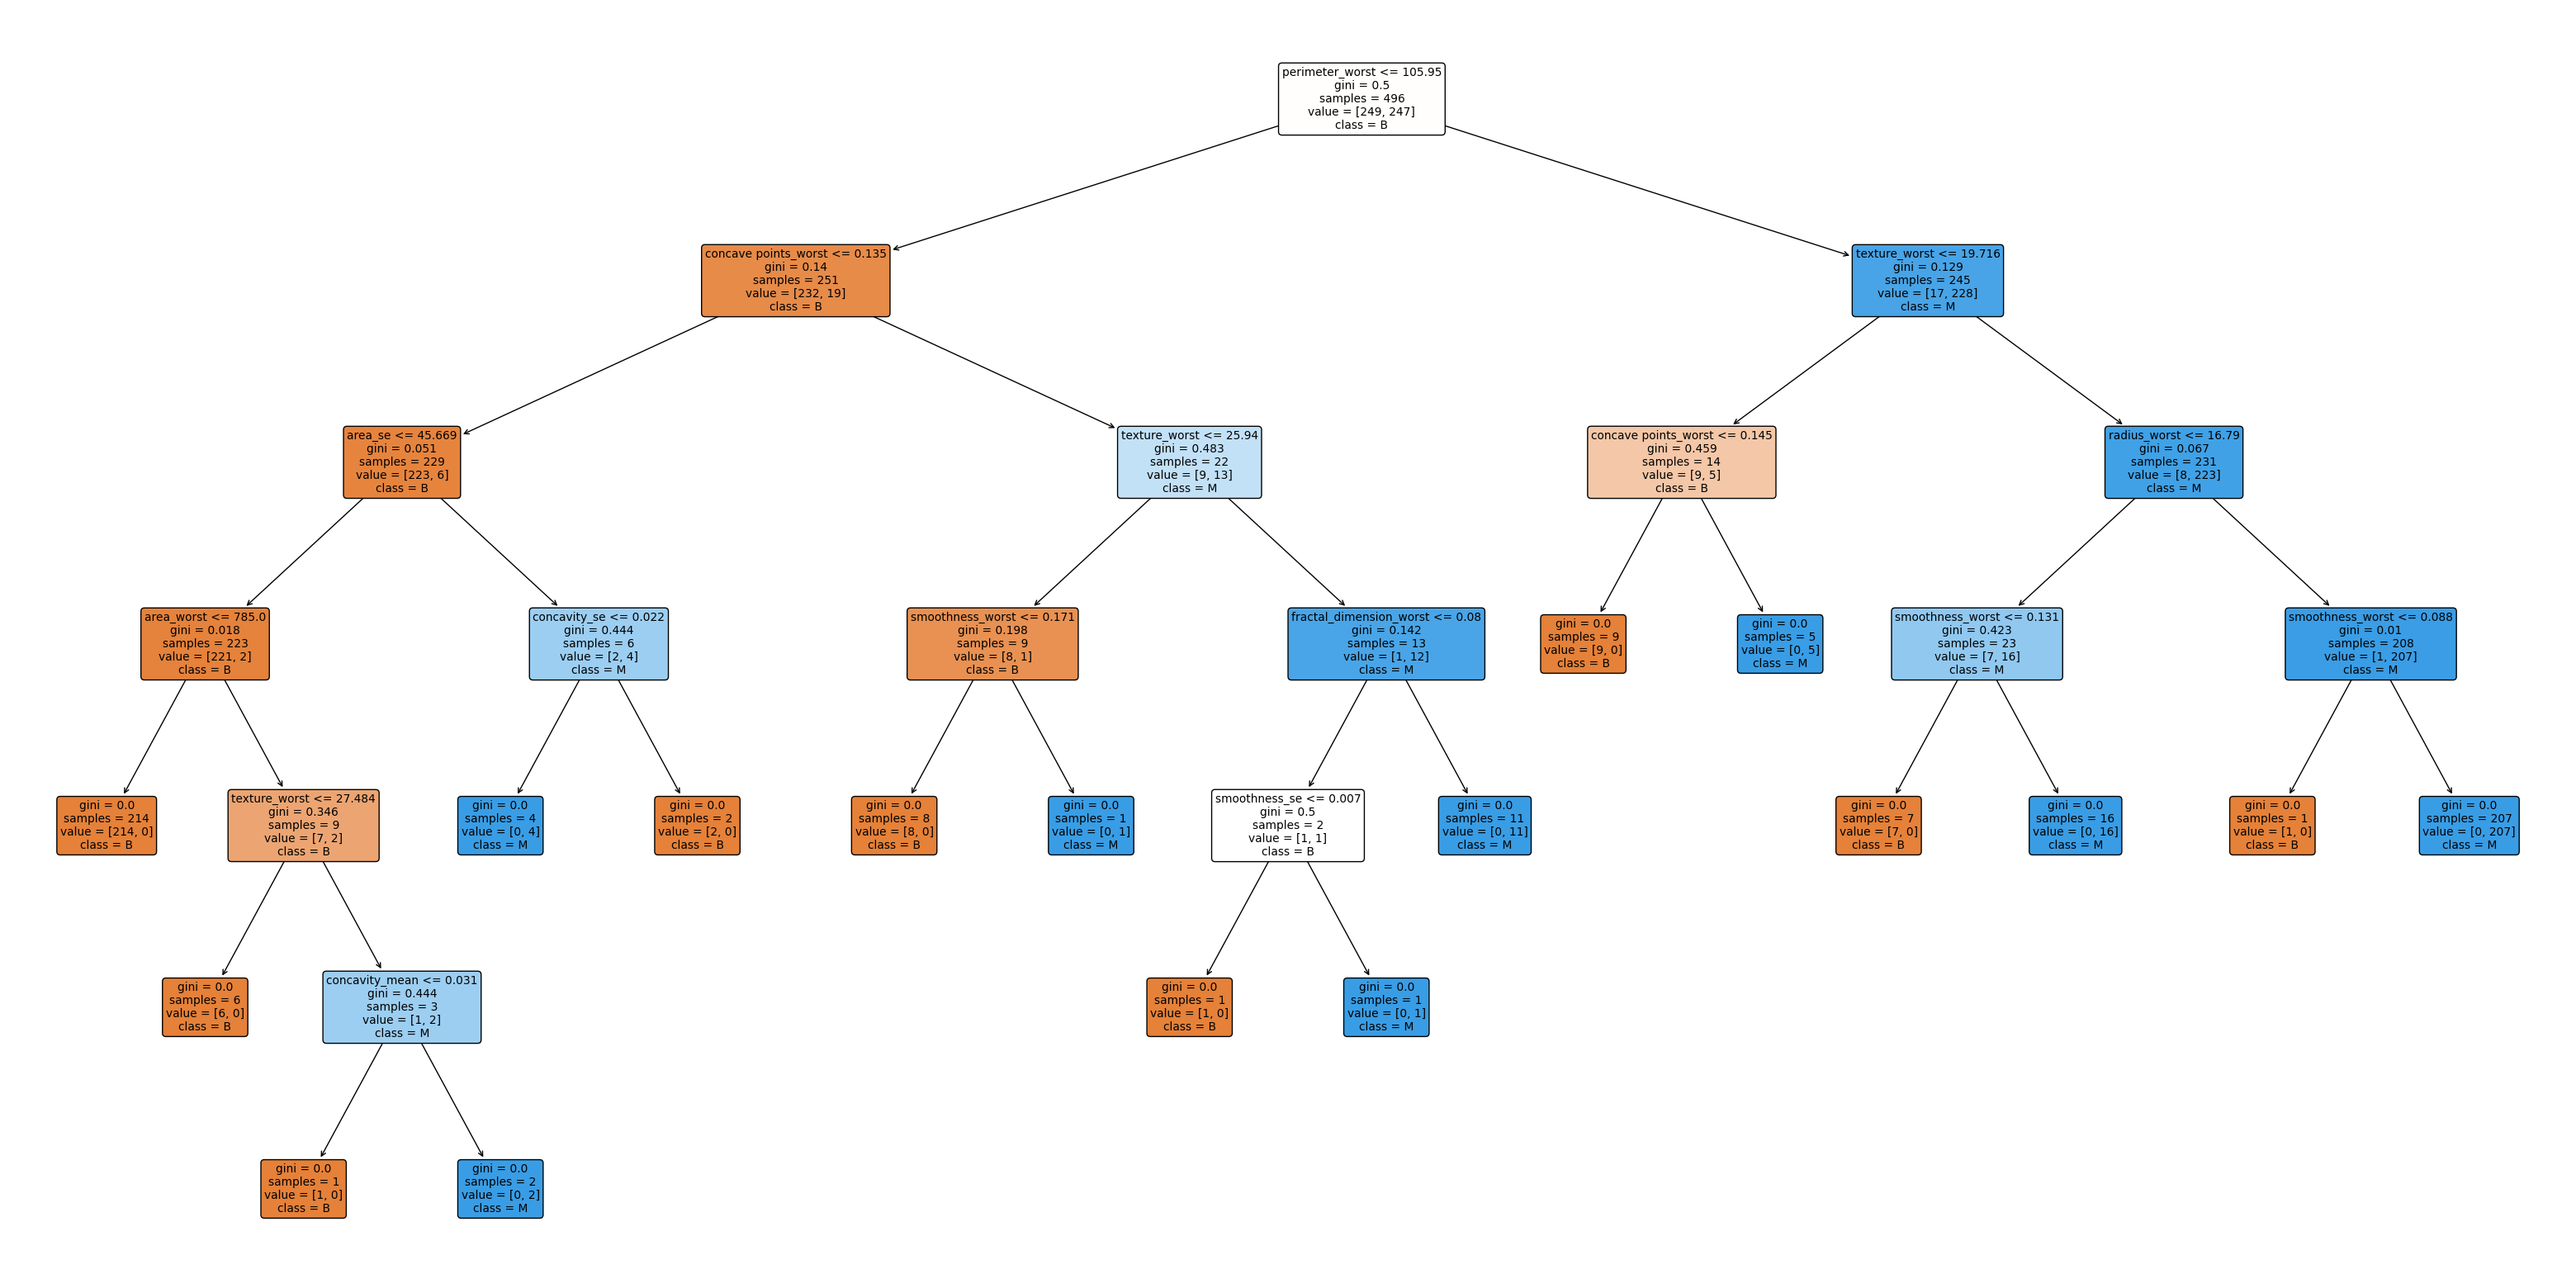

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plot_tree(clf_gini, feature_names=data_cols, class_names=['B', 'M'], filled=True, rounded=True)
plt.show()

**MODELO 2 (ENTROPÍA)**: En este caso, utilizamos como medida de dispersión la entropía, que viene dada como:

$$
Entropia = -\sum_{i=1}^{n} p_i \cdot \log_2(p_i)
$$


In [23]:
X = data_smote[data_cols]
y = data_smote['diagnosis']  # Variable que queremos clasificar

# Dividimos el DataSet en entrenamiento 70 % y test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Creamos nuestro arbol de decisión
clf_entropy = DecisionTreeClassifier(criterion='entropy')

# Entrenamos el arbol de decisión
clf_entropy = clf_entropy.fit(X_train,y_train)

# Hacemos las predicciones, para nuetros datos de test.
y_pred = clf_entropy.predict(X_test)

# Finalmente, valoramos la precisión del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Error:",1 - metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9577464788732394
Error: 0.04225352112676062


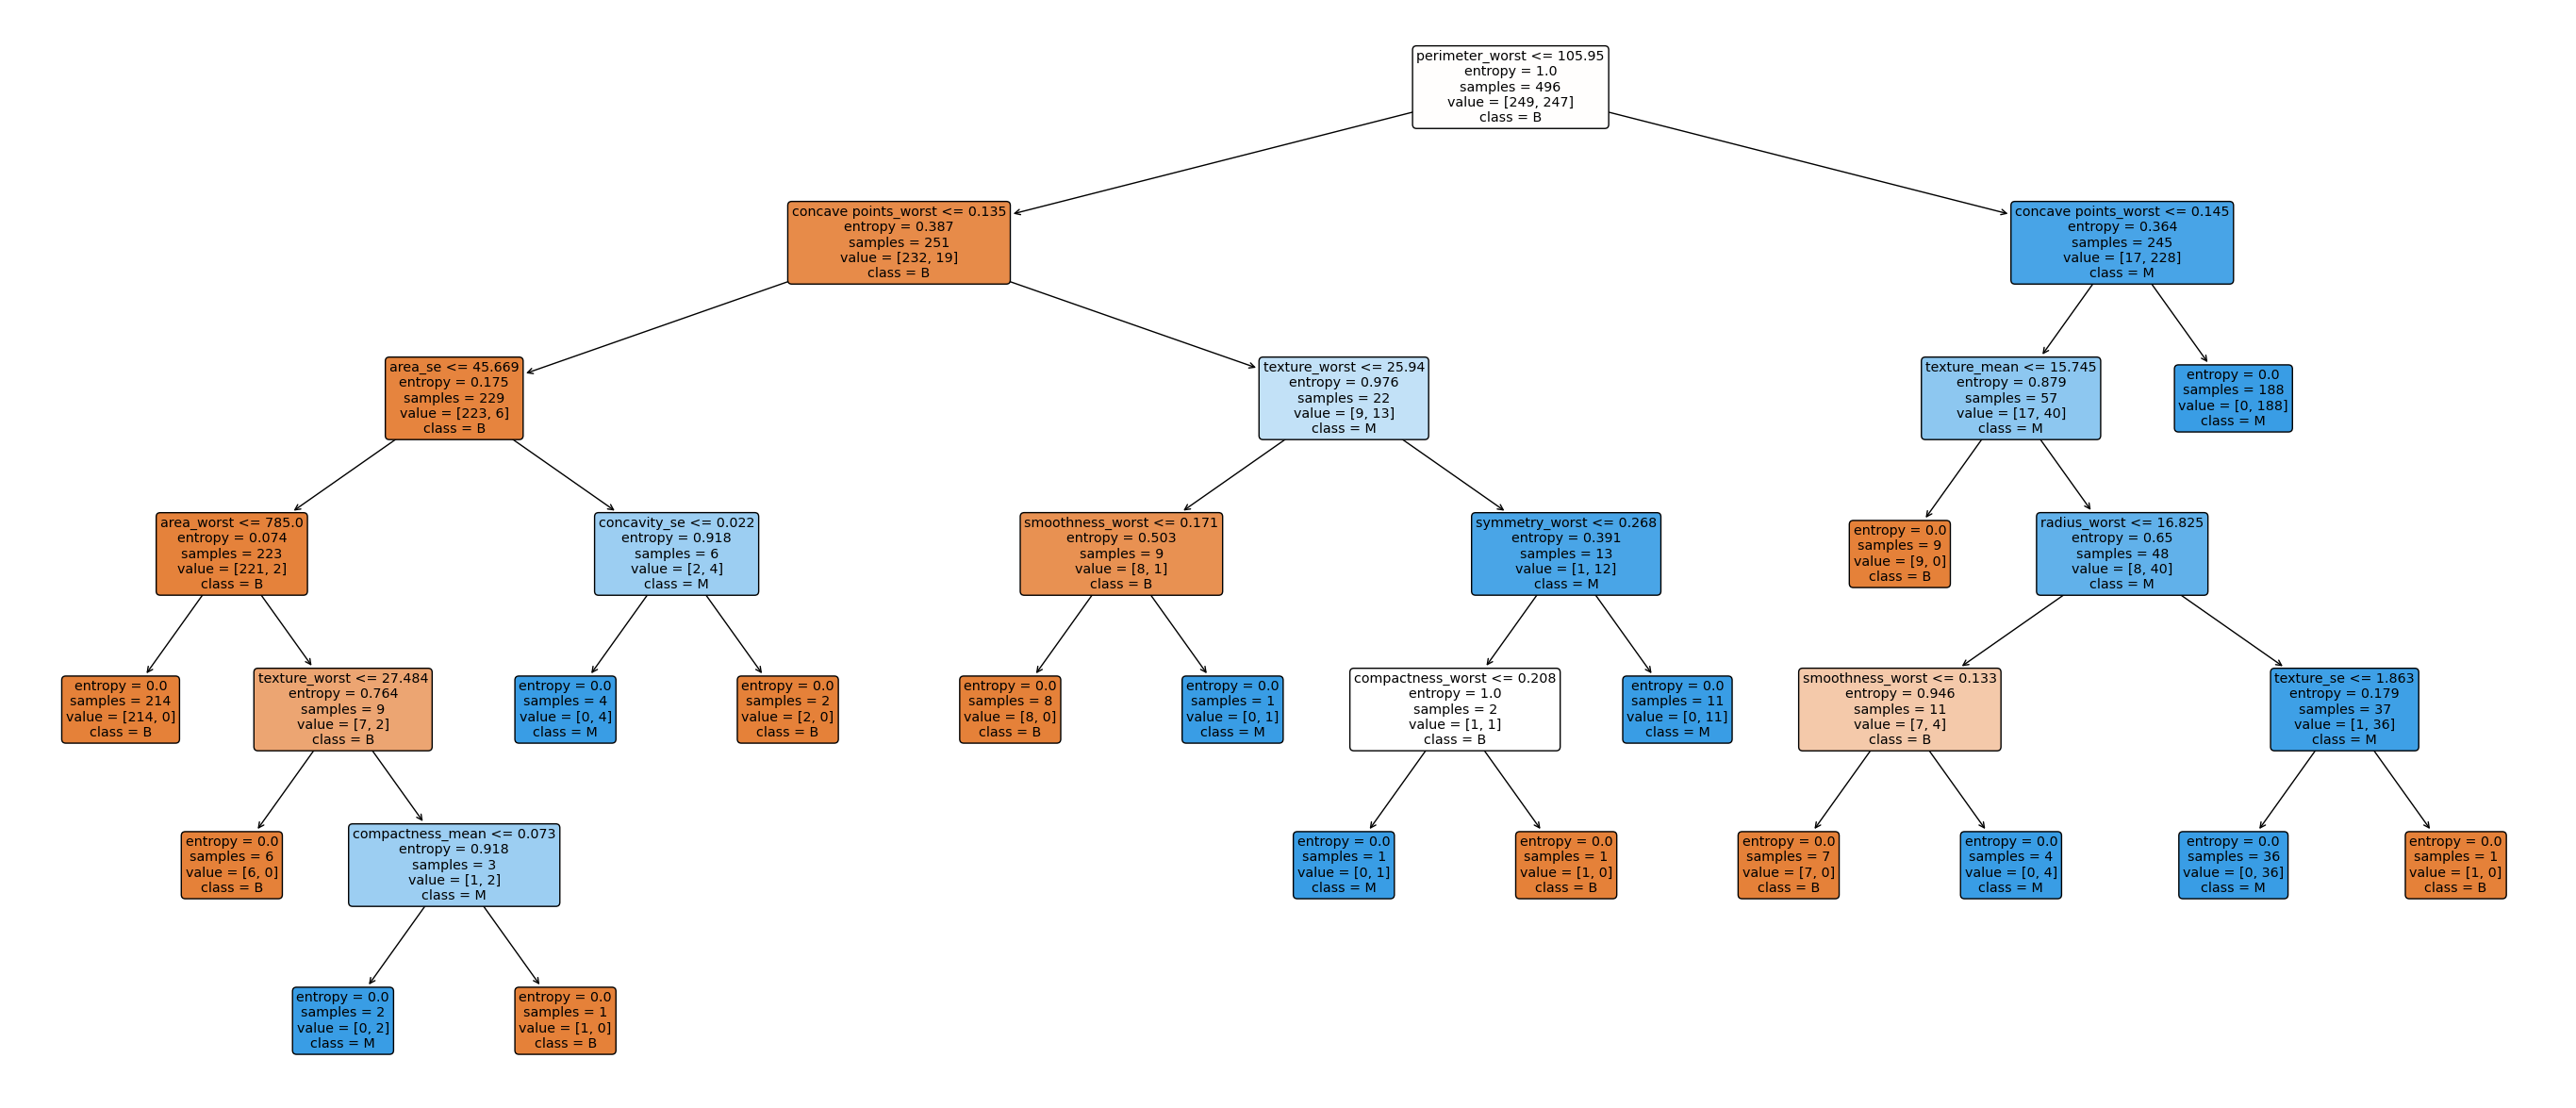

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(35,15))
plot_tree(clf_entropy, feature_names=data_cols, class_names=['B', 'M'], filled=True, rounded=True)
plt.show()

Verficamos que, en caso de queramos limitar nuestro arbol de decisión a menos niveles, por ejemplo solo 2 niveles, utilizando tambien entropía obtendremos un modelo con peor precisión:


In [25]:
X = data_smote[data_cols]
y = data_smote['diagnosis']  # Variable que queremos clasificar

# Dividimos el DataSet en entrenamiento 70 % y test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Creamos nuestro arbol de decisión
clf_entropy_dos = DecisionTreeClassifier(criterion='entropy',
                                     min_samples_split=20,
                                     min_samples_leaf=5,
                                     max_depth=2,
                                     class_weight=None)

# Entrenamos el arbol de decisión
clf_entropy_dos = clf_entropy_dos.fit(X_train,y_train)

# Hacemos las predicciones, para nuetros datos de test.
y_pred = clf_entropy_dos.predict(X_test)

# Finalmente, valoramos la precisión del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Error:",1 - metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9248826291079812
Error: 0.07511737089201875


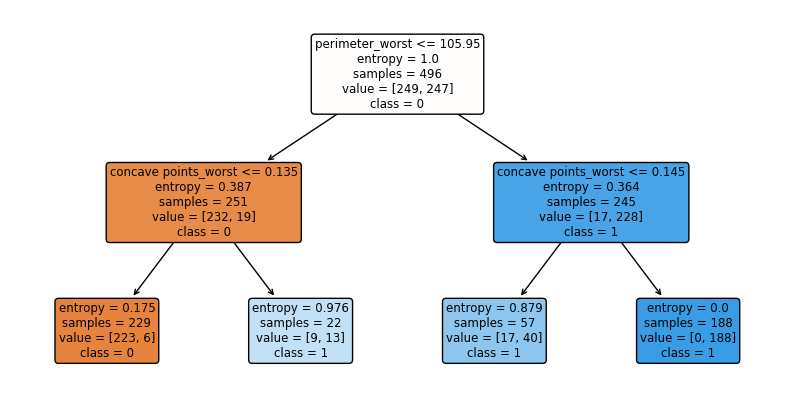

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plot_tree(clf_entropy_dos, feature_names=data_cols, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

Vemos como ambos modelos, nos dan una precisión muy alta, por lo que independientemente de la medida de desorden, obtenemos dos muy buenos clasificadores.


Probamos nuestro modelo para un caso real, donde nos encontramos con un tumor de un paciente, que tiene los siguientes valores:

In [27]:
nueva_observacion = [9.876, 0.1034 , 0.1297, 0.1385, 0.06559, 0.05314, 0.8092, 103.7, 0.004272, 0.00516, 0.01103, 0.005251, 0.007178, 17.7, 15.87, 113.7, 959.5, 0.1643, 0.2239, 0.2989, 0.1306, 0.3163, 0.09251, 1]

# Realizamos la predicción
prediccion = clf_gini.predict([nueva_observacion])

# Muestra la predicción
if prediccion == 'B':
  print("La predicción es:", prediccion)
  print('El tumor, es BENIGNO')
else:
  print("La predicción es:", prediccion)
  print('El tumor, es MALIGNO')


La predicción es: ['B']
El tumor, es BENIGNO


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


A continuación tomaremos el arbol de decisión que emplea GINNI, puesto que da una ligera mejor precisión que emplenado entropía, y apartir de el obtendremos:

-- Dos reglas que sean las que generalicen lo menos posible.


-- Dos que especialicen lo menos posible.

**Reglas más específicas**

En primer lugar, vamos a obtener las reglas más específicas en nuestro modelo con ginni, es decir aquellas que llevan a cabo mas divisiones o ramificaciones, y por tanto mas níveles de profundidad.


In [28]:
from sklearn.tree import DecisionTreeClassifier, export_text

#Obtener el árbol de decision como una cadena
tree_str = export_text(clf_entropy, feature_names=data_cols)

# Dividir el árbol en reglas
rules = tree_str.splitlines()
#print(rules)

# Calcular la profundidad de cada regla
rule_depth = {}

for rule in rules:
    depth = rule.count('|')  # Contar la cantidad de espacios en blanco
    rule_depth[rule] = depth

# Encontrar la profundidad máxima
max_depth = max(rule_depth.values())

# Seleccionar las reglas más específicas (aquellas con la profundidad máxima)
specific_rules = [rule for rule, depth in rule_depth.items() if depth == max_depth]

# Imprimir las reglas más específicas
print("Regla más específica:")
for rule in specific_rules:
    print(rule)



Regla más específica:
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |--- class: B


Estas son las dos reglas, con mas profundidad, ambas con 8 divisiones.

**Reglas mas generales**

Tomaremos ahora las  reglas más generales, aquellas que clasifican sin realizar tantas ramificaciones, es decir profundizando menos niveles:

In [29]:
# Encontramos los niveles únicos presentes en las reglas
unique_levels = set(rule_depth.values())

# Ordenamos los niveles únicos en orden ascendente
sorted_levels = sorted(unique_levels)

rules_gen = []

for level in sorted_levels:
    level_rules = [rule for rule, depth in rule_depth.items() if depth == level and (rule.endswith("class: M") or rule.endswith("class: B"))]
    rules_gen.extend(level_rules)
    if len(rules_gen) >= 4:
        break

print("Las 4 reglas más específicas con los niveles más bajos:")
for rule in rules_gen[:4]:
    print(rule)

Las 4 reglas más específicas con los niveles más bajos:
|   |   |--- class: M
|   |   |   |--- class: B
|   |   |   |   |--- class: B
|   |   |   |   |--- class: M


Las dos reglas más generales, clasifican con 3 y 4 subdivisiones, frente a las 8 que empleaban las reglas más específicas.

**PREDICCIONES REALES**

El útlimo paso de este proyecto, será tomar las 5 muestras de tumores que seleccionamos y separamos al inicio.

Esto son muestras, que no han pasado por nuestro modelo, y que por tanto son totalmente desconocidas, podemos suponer que son datos llegados de las pruebas realizadas en consulta en el día de hoy.

LLevamos a cabo nuestras predicciones, usando el modelo de ginni, y comprobaremos si las predicciones son o no correctas.

In [30]:
import warnings

predicciones_finales = []
resultado_real = []

for i in range (len(filas_aleatorias)):

    nueva_observacion = filas_aleatorias.iloc[i,:-2]
    nueva_observacion_lista = nueva_observacion.tolist()

    # Realizamos la predicción
    warnings.filterwarnings("ignore", category=UserWarning)
    prediccion = clf_gini.predict([nueva_observacion_lista])

    predicciones_finales.append(prediccion)
    resultado_real.append(filas_aleatorias.iloc[i,-2])

# Mostramos los resultados como tabla:

# Datos de ejemplo
pacientes = ['Paciente 1', 'Paciente 2', 'Paciente 3', 'Paciente 4', 'Paciente 5']

# Crear un DataFrame
df = pd.DataFrame({
    '    Paciente': pacientes,
    '    Predicción': predicciones_finales,
    '    Resultado Real': resultado_real
})

# Mostrar la tabla
print(df)

      Paciente     Predicción     Resultado Real
0   Paciente 1            [M]                  M
1   Paciente 2            [M]                  M
2   Paciente 3            [M]                  B
3   Paciente 4            [M]                  M
4   Paciente 5            [M]                  M


Vemos como 4/5 predicciones realizadas, son correctas.

> ## Práctica 2 (TCGA)

TCGA (The Cancer Genome Atlas) es un proyecto colaborativo dirigido por el Instituto Nacional del Cáncer (NCI) y el Instituto Nacional de Investigación del Genoma Humano (NHGRI) en los Estados Unidos. Su objetivo principal es caracterizar exhaustivamente las alteraciones genómicas en el cáncer mediante el análisis de grandes conjuntos de datos de pacientes con cáncer. Se pretende crear un clasificador de cáncer que tenga en cuenta las probabilidades de pertenecer a una clase dependiendo de las distintas variables y sus valores. Usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1)Realiza todo el preprocesamiento necesario para poder entrenar el clasificador con datos categóricos (en el caso de transformaciones de datos continuos se usarán los cuartiles creados por el diagrama de tallos y hojas). Muestra las distintas tablas de distribución. (1 punto)

Para obtener una comprensión inicial de los datos y comenzar con el preprocesamiento, se realizará una exploración de los datos.

In [31]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Especicicamos la ruta del archivo CSV en Google Drive
ruta_archivo_drive = '/content/drive/MyDrive/TCGA.csv'

# Cargamos el archivo CSV en un DataFrame de pandas
data_TCGA = pd.read_csv(ruta_archivo_drive)


# Mostramos el Dataframe, verificando que los datos se han cargado correctamente
data_TCGA.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Grade   Project       Case_ID  Gender   Age_at_diagnosis  \
0   LGG  TCGA-LGG  TCGA-DU-8164    Male  51 years 108 days   
1   LGG  TCGA-LGG  TCGA-QH-A6CY    Male  38 years 261 days   
2   LGG  TCGA-LGG  TCGA-HW-A5KM    Male   35 years 62 days   
3   LGG  TCGA-LGG  TCGA-E1-A7YE  Female  32 years 283 days   
4   LGG  TCGA-LGG  TCGA-S9-A6WG    Male  31 years 187 days   

         Primary_Diagnosis   Race     IDH1         TP53         ATRX  ...  \
0   Oligodendroglioma, NOS  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
1             Mixed glioma  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
2         Astrocytoma, NOS  white  MUTATED      MUTATED      MUTATED  ...   
3  Astrocytoma, anaplastic  white  MUTATED      MUTATED      MUTATED  ...   
4  Astrocytoma, anaplastic  white  MUTATED      MUTATED      MUTATED  ...   

         FUBP1          RB1       NOTCH1         BCOR        CSMD3  \
0      MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
3  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
4  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   

       SMARCA4       GRIN2A         IDH2         FAT4       PDGFRA  
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
3  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED      MUTATED  NOT_MUTATED  
4  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  

[5 rows x 27 columns]

In [32]:
data_TCGA.shape

(862, 27)

In [33]:
data_TCGA.tail()

Grade   Project       Case_ID  Gender   Age_at_diagnosis  \
857   GBM  TCGA-GBM  TCGA-19-5959  Female  77 years 325 days   
858   GBM  TCGA-GBM  TCGA-16-0846    Male   85 years 65 days   
859   GBM  TCGA-GBM  TCGA-28-1746  Female  77 years 178 days   
860   GBM  TCGA-GBM  TCGA-32-2491    Male  63 years 121 days   
861   GBM  TCGA-GBM  TCGA-06-2557    Male  76 years 221 days   

    Primary_Diagnosis                       Race         IDH1         TP53  \
857      Glioblastoma                      white  NOT_MUTATED  NOT_MUTATED   
858      Glioblastoma                      white  NOT_MUTATED      MUTATED   
859      Glioblastoma                      white  NOT_MUTATED      MUTATED   
860      Glioblastoma                      white  NOT_MUTATED      MUTATED   
861      Glioblastoma  black or african american  NOT_MUTATED  NOT_MUTATED   

            ATRX  ...        FUBP1          RB1       NOTCH1         BCOR  \
857  NOT_MUTATED  ...  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
858  NOT_MUTATED  ...  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
859  NOT_MUTATED  ...  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
860  NOT_MUTATED  ...  NOT_MUTATED      MUTATED  NOT_MUTATED  NOT_MUTATED   
861  NOT_MUTATED  ...  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   

           CSMD3      SMARCA4       GRIN2A         IDH2         FAT4  \
857  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
858  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
859  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
860  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
861  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   

          PDGFRA  
857  NOT_MUTATED  
858  NOT_MUTATED  
859  NOT_MUTATED  
860  NOT_MUTATED  
861  NOT_MUTATED  

[5 rows x 27 columns]

In [34]:
data_TCGA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 non-null    object
 5   Primary_Diagnosis  862 non-null    object
 6   Race               862 non-null    object
 7   IDH1               862 non-null    object
 8   TP53               862 non-null    object
 9   ATRX               862 non-null    object
 10  PTEN               862 non-null    object
 11  EGFR               862 non-null    object
 12  CIC                862 non-null    object
 13  MUC16              862 non-null    object
 14  PIK3CA             862 non-null    object
 15  NF1                862 non-null    object
 16  PIK3R1             862 non-null    object
 1

In [35]:
import pandas as pd



# Imprimir el número de filas
print(f"El DataFrame tiene {data_TCGA.shape[0]} filas.")


El DataFrame tiene 862 filas.


 Realizamos una limpieza de datos para abordar los valores faltantes en nuestro DataFrame. Primero, estamos reemplazando los valores '--' y 'not reported' con NaN, que son valores que indican que los datos no están disponibles. Después de eso, eliminamos las filas que contienen cualquier valor NaN. Esto nos permite asegurarnos de que nuestro DataFrame esté libre de datos faltantes antes de continuar con el análisis.

 Finalmente, imprimimos el número de filas restantes en el DataFrame después de esta limpieza de datos para tener una idea de cuántas observaciones conservamos después de eliminar las filas con valores faltantes.


In [36]:
import pandas as pd
import numpy as np

# Reemplazar '--' con NaN (Not a Number)
data_TCGA = data_TCGA.replace('--', np.nan)
data_TCGA = data_TCGA.replace('not reported', np.nan)

# Eliminar filas con cualquier NaN
data_TCGA = data_TCGA.dropna()


# Imprimir el número de filas
print(f"El DataFrame tiene {data_TCGA.shape[0]} filas.")


El DataFrame tiene 839 filas.


Eliminamos las tres primeras columnas de nuestro DataFrame, que son 'Project', 'Case_ID'. Estas columnas no aportan información relevante para nuestra tarea de clasificación, por lo que decidimos quitarlas del conjunto de datos. Al hacerlo, reducimos la dimensionalidad de nuestros datos y nos enfocamos en las características que son más relevantes para la clasificación, lo que puede mejorar el rendimiento y la eficiencia de nuestro modelo. Después de eliminar estas columnas, verificamos el resultado mostrando las primeras filas del DataFrame para asegurarnos de que las columnas hayan sido eliminadas correctamente. Este paso es parte del proceso de preparación de datos, que busca simplificar y optimizar el conjunto de datos para el análisis y modelado subsiguientes.

In [37]:
# Eliminar las tres primeras columnas
data_TCGA = data_TCGA.drop(columns=['Project', 'Case_ID'])

# Mostrar las primeras filas del DataFrame para verificar el resultado
data_TCGA.head()


Grade  Gender   Age_at_diagnosis        Primary_Diagnosis   Race     IDH1  \
0   LGG    Male  51 years 108 days   Oligodendroglioma, NOS  white  MUTATED   
1   LGG    Male  38 years 261 days             Mixed glioma  white  MUTATED   
2   LGG    Male   35 years 62 days         Astrocytoma, NOS  white  MUTATED   
3   LGG  Female  32 years 283 days  Astrocytoma, anaplastic  white  MUTATED   
4   LGG    Male  31 years 187 days  Astrocytoma, anaplastic  white  MUTATED   

          TP53         ATRX         PTEN         EGFR  ...        FUBP1  \
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  ...      MUTATED   
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  ...  NOT_MUTATED   
2      MUTATED      MUTATED  NOT_MUTATED  NOT_MUTATED  ...  NOT_MUTATED   
3      MUTATED      MUTATED  NOT_MUTATED  NOT_MUTATED  ...  NOT_MUTATED   
4      MUTATED      MUTATED  NOT_MUTATED  NOT_MUTATED  ...  NOT_MUTATED   

           RB1       NOTCH1         BCOR        CSMD3      SMARCA4  \
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
3  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
4  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   

        GRIN2A         IDH2         FAT4       PDGFRA  
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
3  NOT_MUTATED  NOT_MUTATED      MUTATED  NOT_MUTATED  
4  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  

[5 rows x 25 columns]

 Transformamos la columna 'Age_at_diagnosis' de nuestro conjunto de datos. Creamos una función que divide la cadena de edad en partes y convierte la parte de los dias en un número proorcional a los años, calculando la fracción del año para los días y la sumamos a los años para obtener una representación de la edad en años con mayor precisión. Esta transformación nos permite representar la edad de manera más precisa y adecuada para su uso en nuestro análisis y modelado.

In [38]:
import pandas as pd


# Definir la función para transformar la columna 'Age_at_diagnosis'
def convertir_edad(edad_str):
    # Dividir la cadena por espacios
    partes = edad_str.split()
    # Convertir la parte de los años a entero
    años = int(partes[0])
    # Convertir la parte de los días a entero si está presente, de lo contrario usar cero
    días = int(partes[2]) if len(partes) > 2 else 0
    # Calcular la fracción del año para los días y sumarla a los años
    años_con_fracción = años + (días / 365.25)
    # Devolver el resultado como un número flotante
    return años_con_fracción

# Aplicar la función a la columna 'Age_at_diagnosis'
data_TCGA['Age_at_diagnosis'] = data_TCGA['Age_at_diagnosis'].apply(convertir_edad)

# Mostrar las primeras filas para verificar el resultado
print(data_TCGA['Age_at_diagnosis'].head())





0    51.295688
1    38.714579
2    35.169747
3    32.774812
4    31.511978
Name: Age_at_diagnosis, dtype: float64


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=eba0060842f032ffc91493825436c00ca198d6e1453e648e065338d1b4de45f6
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


(<Figure size 750x275 with 1 Axes>, <Axes: >)

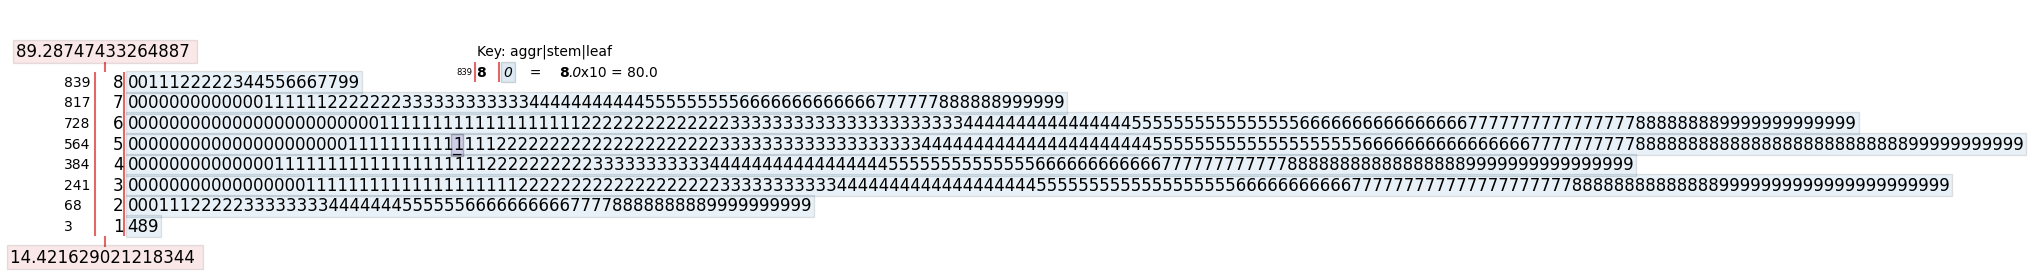

In [39]:

import sys
!{sys.executable} -m pip install stemgraphic
import stemgraphic


stemgraphic.stem_graphic(data_TCGA['Age_at_diagnosis'], scale = 10)

In [40]:

#Calculamos los cuartiles
Q1 = data_TCGA['Age_at_diagnosis'].quantile(0.25)
Q2 = data_TCGA['Age_at_diagnosis'].quantile(0.50)  # Esto también es la mediana
Q3 = data_TCGA['Age_at_diagnosis'].quantile(0.75)


print(f"Primer cuartil (Q1): {min(data_TCGA['Age_at_diagnosis']), Q1}")
print(f"Segundo cuartil (Q2) o Mediana: {Q1, Q2}")
print(f"Tercer cuartil (Q3): {Q2, Q3}")
print(f"Cuarto cuartil (Q4) o Valor máximo: {Q3, max(data_TCGA['Age_at_diagnosis'])}")
import pandas as pd


# Definimos los bins usando los cuartiles
bins = [-float('inf'), Q1, Q2, Q3, float('inf')]
labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Reemplazamos la columna 'Age_at_diagnosis' con las categorías calculadas
data_TCGA['Age_at_diagnosis'] = pd.cut(data_TCGA['Age_at_diagnosis'], bins=bins, labels=labels, include_lowest=True)

# Verificar los primeros registros para confirmar que la categorización se ha aplicado correctamente
data_TCGA.head()


Primer cuartil (Q1): (14.421629021218344, 38.050650239561946)
Segundo cuartil (Q2) o Mediana: (38.050650239561946, 51.550308008213555)
Tercer cuartil (Q3): (51.550308008213555, 62.799452429842574)
Cuarto cuartil (Q4) o Valor máximo: (62.799452429842574, 89.28747433264887)


Grade  Gender Age_at_diagnosis        Primary_Diagnosis   Race     IDH1  \
0   LGG    Male               Q2   Oligodendroglioma, NOS  white  MUTATED   
1   LGG    Male               Q2             Mixed glioma  white  MUTATED   
2   LGG    Male               Q1         Astrocytoma, NOS  white  MUTATED   
3   LGG  Female               Q1  Astrocytoma, anaplastic  white  MUTATED   
4   LGG    Male               Q1  Astrocytoma, anaplastic  white  MUTATED   

          TP53         ATRX         PTEN         EGFR  ...        FUBP1  \
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  ...      MUTATED   
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  ...  NOT_MUTATED   
2      MUTATED      MUTATED  NOT_MUTATED  NOT_MUTATED  ...  NOT_MUTATED   
3      MUTATED      MUTATED  NOT_MUTATED  NOT_MUTATED  ...  NOT_MUTATED   
4      MUTATED      MUTATED  NOT_MUTATED  NOT_MUTATED  ...  NOT_MUTATED   

           RB1       NOTCH1         BCOR        CSMD3      SMARCA4  \
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
3  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
4  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   

        GRIN2A         IDH2         FAT4       PDGFRA  
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
3  NOT_MUTATED  NOT_MUTATED      MUTATED  NOT_MUTATED  
4  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  

[5 rows x 25 columns]

Se realizan cálculos para determinar los cuartiles de la edad al diagnóstico en un conjunto de datos. Los cuartiles son estadísticas que dividen una distribución ordenada de datos en cuatro partes iguales, y se identifican los valores correspondientes al primer cuartil (Q1), al segundo cuartil o mediana (Q2), y al tercer cuartil (Q3). Estos valores reflejan la distribución de las edades al momento del diagnóstico, indicando los rangos de edad que separan el conjunto de datos en cuartos. Se presenta el valor mínimo y el primer cuartil, el primer cuartil y la mediana, la mediana y el tercer cuartil, así como el tercer cuartil y el valor máximo.

Además, se define una serie de intervalos o "bins" basados en los cuartiles para categorizar las edades en cuatro grupos distintos, etiquetados desde Q1 hasta Q4. Cada grupo representa un rango de edades que cae dentro de uno de los cuartiles de la distribución. La edad al diagnóstico se convierte a una variable categórica para facilitar su análisis por estos grupos.

In [41]:
# Definir el mapeo de los valores
mapping = {'MUTATED': 1, 'NOT_MUTATED': 0}

# Lista de columnas a cambiar
columns_to_change = ['IDH1', 'TP53', 'ATRX', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA', 'PTEN',	'EGFR',	'CIC', 'MUC16', 'PIK3CA','NF1','PIK3R1' ]

# Aplicar el cambio a cada columna especificada
for column in columns_to_change:
    data_TCGA[column] = data_TCGA[column].replace(mapping)
# Ya aplicaste el mapeo numérico como se muestra arriba

# Ahora convertiré las columnas numéricas a tipo categórico
for column in columns_to_change:
    data_TCGA[column] = data_TCGA[column].astype('category')
 # Para mostrar los tipos de datos de las columnas modificadas

data_TCGA.head()


Grade  Gender Age_at_diagnosis        Primary_Diagnosis   Race IDH1 TP53  \
0   LGG    Male               Q2   Oligodendroglioma, NOS  white    1    0   
1   LGG    Male               Q2             Mixed glioma  white    1    0   
2   LGG    Male               Q1         Astrocytoma, NOS  white    1    1   
3   LGG  Female               Q1  Astrocytoma, anaplastic  white    1    1   
4   LGG    Male               Q1  Astrocytoma, anaplastic  white    1    1   

  ATRX PTEN EGFR  ... FUBP1 RB1 NOTCH1 BCOR CSMD3 SMARCA4 GRIN2A IDH2 FAT4  \
0    0    0    0  ...     1   0      0    0     0       0      0    0    0   
1    0    0    0  ...     0   0      0    0     0       0      0    0    0   
2    1    0    0  ...     0   0      0    0     0       0      0    0    0   
3    1    0    0  ...     0   0      0    0     0       0      0    0    1   
4    1    0    0  ...     0   0      0    0     0       0      0    0    0   

  PDGFRA  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 25 columns]

Realizamos transformaciones en varias columnas de nuestro conjunto de datos. Primero, establecemos un mapeo de valores donde 'MUTATED' se asigna a 1 y 'NOT_MUTATED' se asigna a 0. Luego, identificamos una lista de columnas que contienen información sobre la presencia o ausencia de mutaciones genéticas. Aplicamos este mapeo a cada una de estas columnas para cambiar los valores 'MUTATED' y 'NOT_MUTATED' por 1 y 0, respectivamente.

Después de esta transformación, convertimos estas columnas numéricas en columnas de tipo categórico. Esto nos permite representar estas variables como categorías en lugar de valores numéricos, lo que puede ser útil para ciertos tipos de análisis y visualización.


In [42]:
# Definir un diccionario para mapear los valores de género a 1 (Male) y 0 (Female)
gender_mapping = {'Male': 1, 'Female': 0}

# Aplicar el mapeo a la columna 'Gender'
data_TCGA['Gender'] = data_TCGA['Gender'].map(gender_mapping)
data_TCGA['Gender'] = data_TCGA['Gender'].astype('category')

# Mostrar las primeras filas para verificar el resultado

data_TCGA.head()

Grade Gender Age_at_diagnosis        Primary_Diagnosis   Race IDH1 TP53  \
0   LGG      1               Q2   Oligodendroglioma, NOS  white    1    0   
1   LGG      1               Q2             Mixed glioma  white    1    0   
2   LGG      1               Q1         Astrocytoma, NOS  white    1    1   
3   LGG      0               Q1  Astrocytoma, anaplastic  white    1    1   
4   LGG      1               Q1  Astrocytoma, anaplastic  white    1    1   

  ATRX PTEN EGFR  ... FUBP1 RB1 NOTCH1 BCOR CSMD3 SMARCA4 GRIN2A IDH2 FAT4  \
0    0    0    0  ...     1   0      0    0     0       0      0    0    0   
1    0    0    0  ...     0   0      0    0     0       0      0    0    0   
2    1    0    0  ...     0   0      0    0     0       0      0    0    0   
3    1    0    0  ...     0   0      0    0     0       0      0    0    1   
4    1    0    0  ...     0   0      0    0     0       0      0    0    0   

  PDGFRA  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 25 columns]

 Transformamos la columna 'Gender' de nuestro conjunto de datos. Para ello, primero establecemos un mapeo de valores donde asignamos el valor 1 a 'Male' y el valor 0 a 'Female'. Luego, aplicamos este mapeo a la columna 'Gender', lo que significa que estamos cambiando los valores de género por valores numéricos correspondientes.

Después de esta transformación, convertimos la columna 'Gender' a un tipo especial de categoría, lo que nos permite representar esta variable como una categoría en lugar de un valor numérico. Esto puede ser útil para ciertos tipos de análisis y visualización.


In [43]:
# Convirtiendo 'Race' y 'Primary_Diagnosis' a variables categóricas
data_TCGA['Race'] = data_TCGA['Race'].astype('category')
data_TCGA['Primary_Diagnosis'] = data_TCGA['Primary_Diagnosis'].astype('category')
data_TCGA['Grade'] = data_TCGA['Grade'].astype('category')


Convertimos las columnas 'Race', 'Primary_Diagnosis' y 'Grade' en variables categóricas. Esto significa que estamos cambiando el tipo de datos de estas columnas a un formato especializado que representa categorías en lugar de valores numéricos o de texto.

La conversión de estas columnas a variables categóricas es útil para el análisis y modelado subsiguientes, ya que proporciona una representación más adecuada de estas variables. Además, puede ayudar a mejorar el rendimiento del modelo al permitir que el algoritmo comprenda que estas variables representan categorías discretas en lugar de números continuos.

In [44]:
data_TCGA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 0 to 861
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Grade              839 non-null    category
 1   Gender             839 non-null    category
 2   Age_at_diagnosis   839 non-null    category
 3   Primary_Diagnosis  839 non-null    category
 4   Race               839 non-null    category
 5   IDH1               839 non-null    category
 6   TP53               839 non-null    category
 7   ATRX               839 non-null    category
 8   PTEN               839 non-null    category
 9   EGFR               839 non-null    category
 10  CIC                839 non-null    category
 11  MUC16              839 non-null    category
 12  PIK3CA             839 non-null    category
 13  NF1                839 non-null    category
 14  PIK3R1             839 non-null    category
 15  FUBP1              839 non-null    category
 16  RB1          

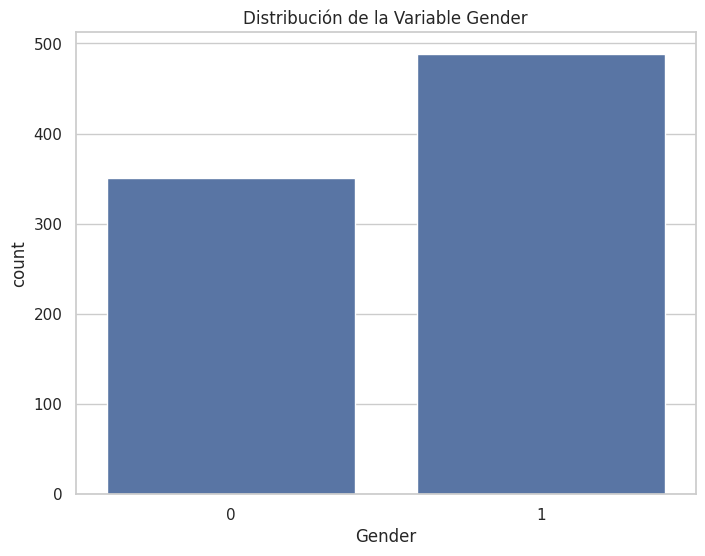

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de seaborn
sns.set(style="whitegrid")

# Tabla de distribución para la variable 'Gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data_TCGA)
plt.title('Distribución de la Variable Gender')
plt.show()



La gráfica representa la distribución de género, mostrando dos barras que corresponden a dos categorías. La altura de las barras refleja la cantidad de registros para cada género.

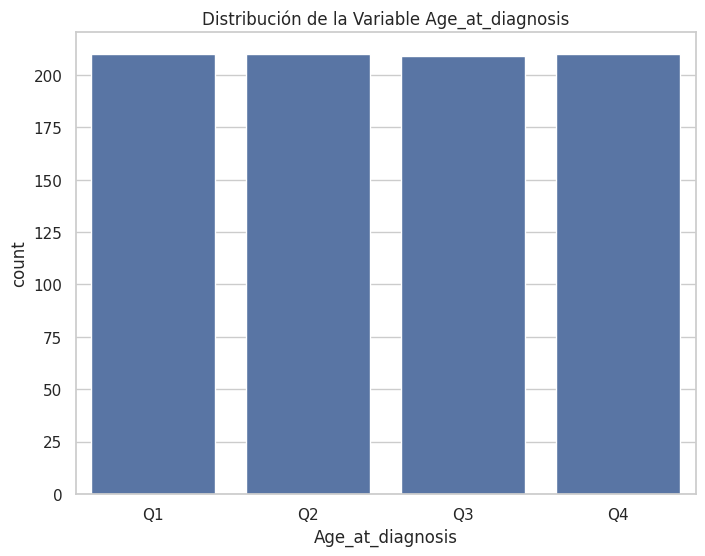

In [46]:

# Tabla de distribución para la variable 'Age_at_diagnosis' (4 cuartiles)
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_at_diagnosis', data=data_TCGA)
plt.title('Distribución de la Variable Age_at_diagnosis')
plt.show()



La gráfica muestra una distribución casi uniforme de las edades al diagnóstico entre los primeros tres cuartiles (Q1, Q2, Q3) y un ligero aumento en el cuarto cuartil (Q4), sugiriendo una mayor concentración de pacientes con edades mayores en este último segmento.

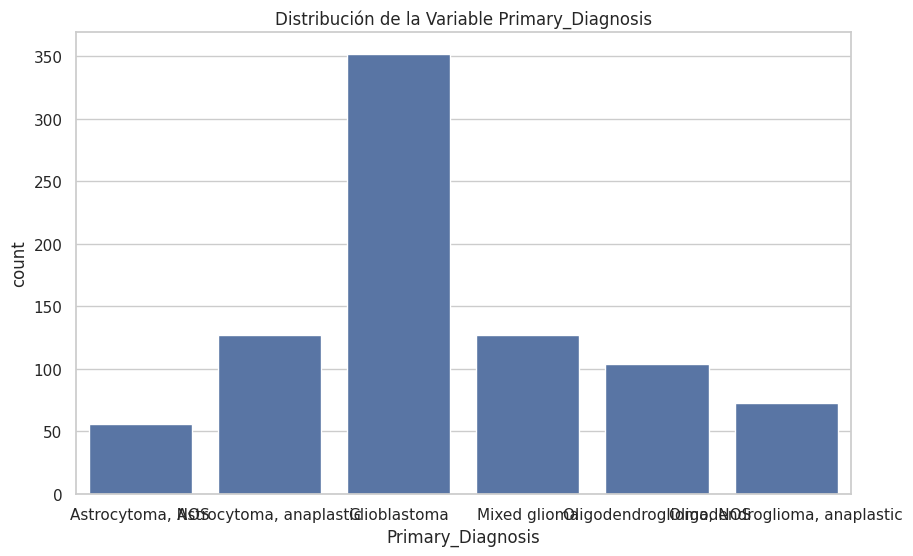

In [47]:
# Tabla de distribución para la variable 'Primary_Diagnosis' (6 clases)
plt.figure(figsize=(10, 6))
sns.countplot(x='Primary_Diagnosis', data=data_TCGA)
plt.title('Distribución de la Variable Primary_Diagnosis')
plt.show()


Esta gráfica muestra la distribución de diagnósticos primarios en un conjunto de datos. El Glioblastoma es notablemente la categoría más común, mientras que las demás tienen una frecuencia menor y más comparable entre sí.

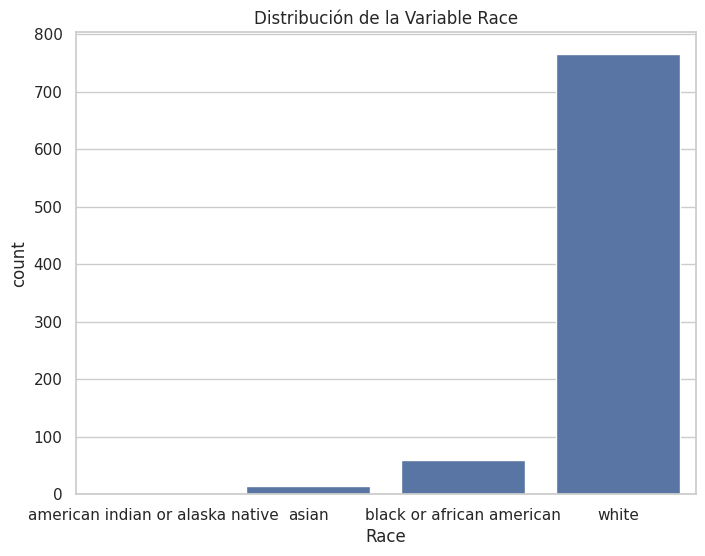

In [48]:

# Tabla de distribución para la variable 'Race' (2 clases)
plt.figure(figsize=(8, 6))
sns.countplot(x='Race', data=data_TCGA)
plt.title('Distribución de la Variable Race')
plt.show()


La gráfica ilustra la distribución de la raza, con varias barras que representan diferentes categorías raciales. Una categoría, "blanco", domina notoriamente en comparación con las demás.

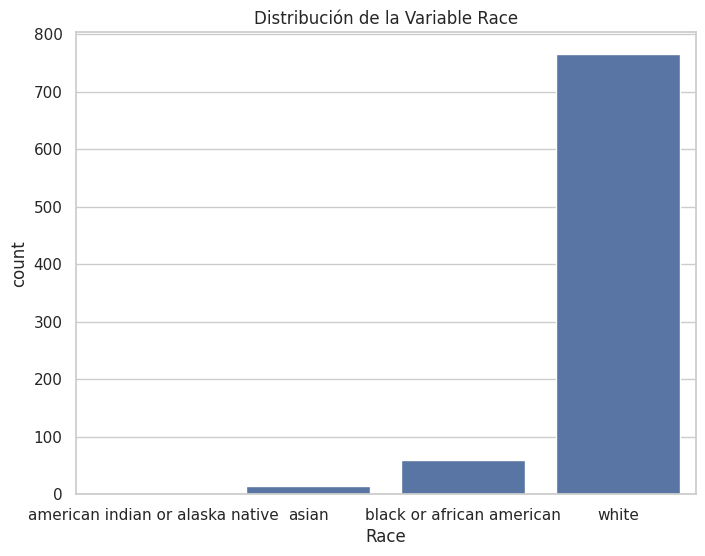

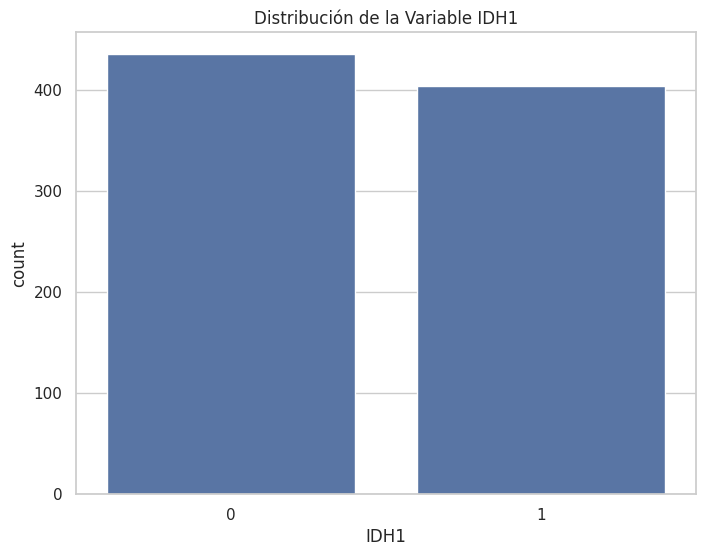

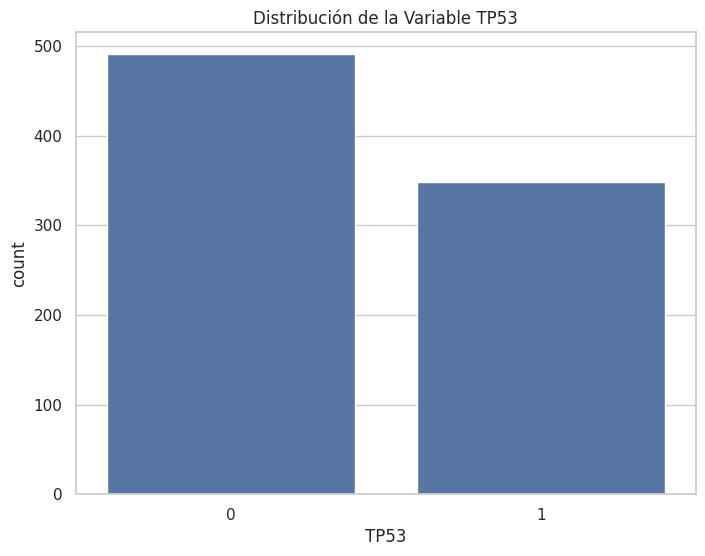

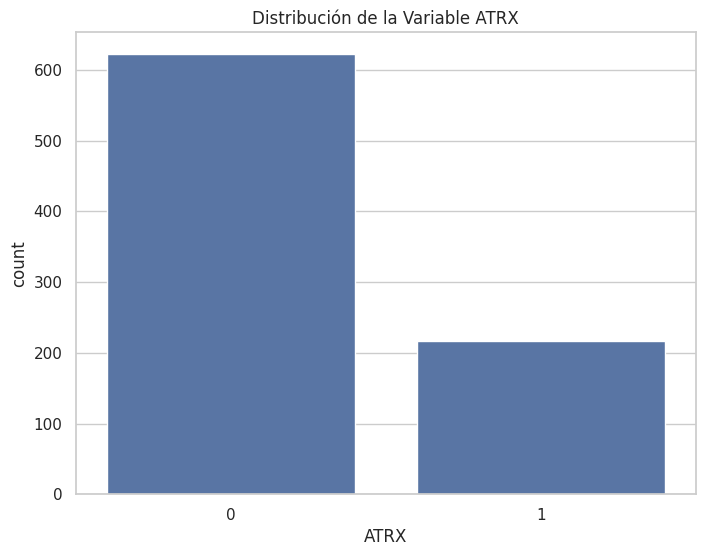

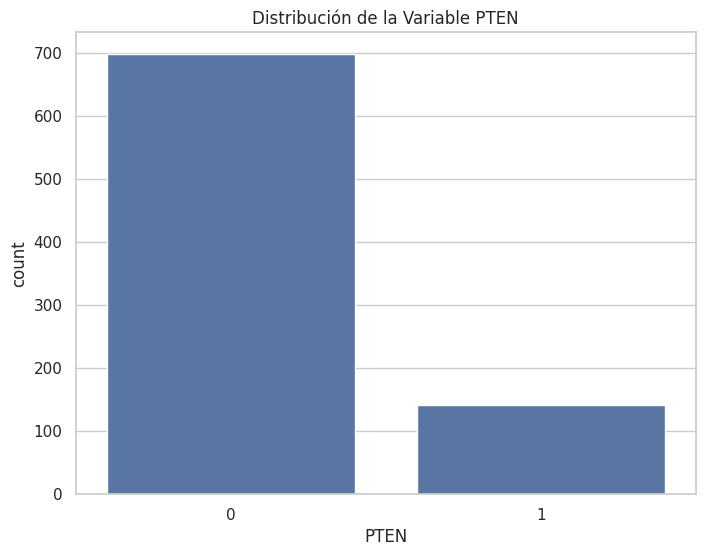

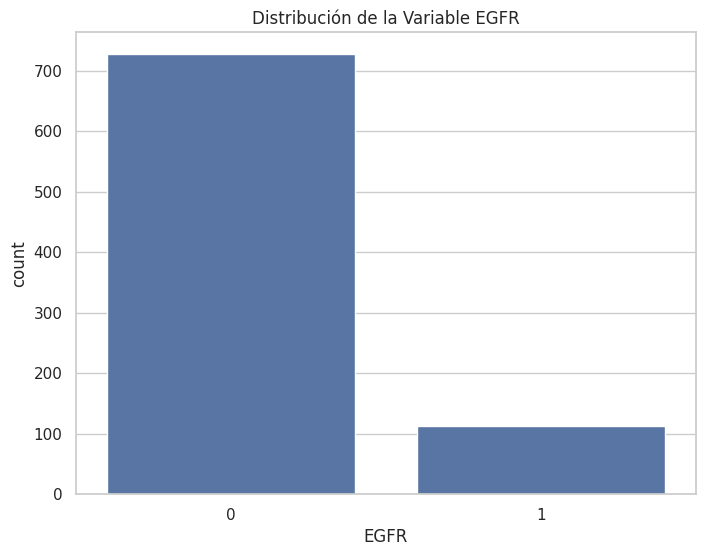

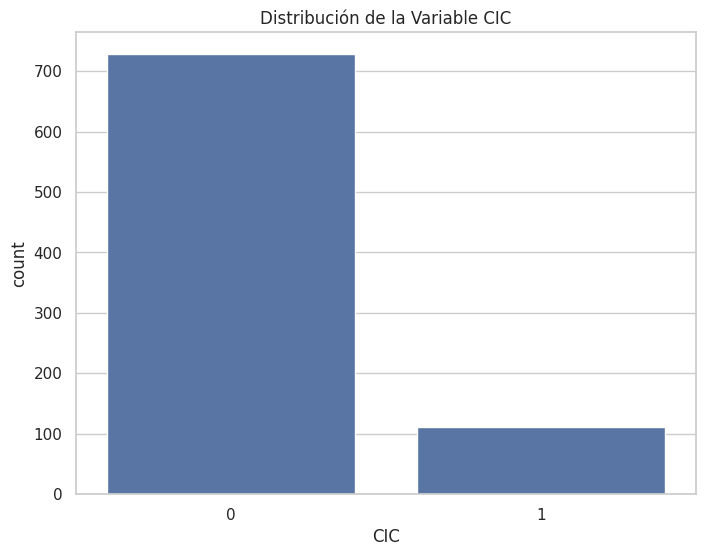

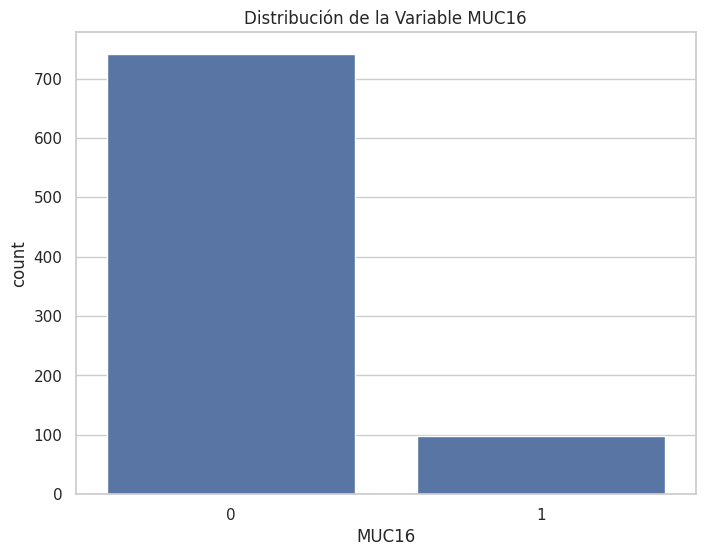

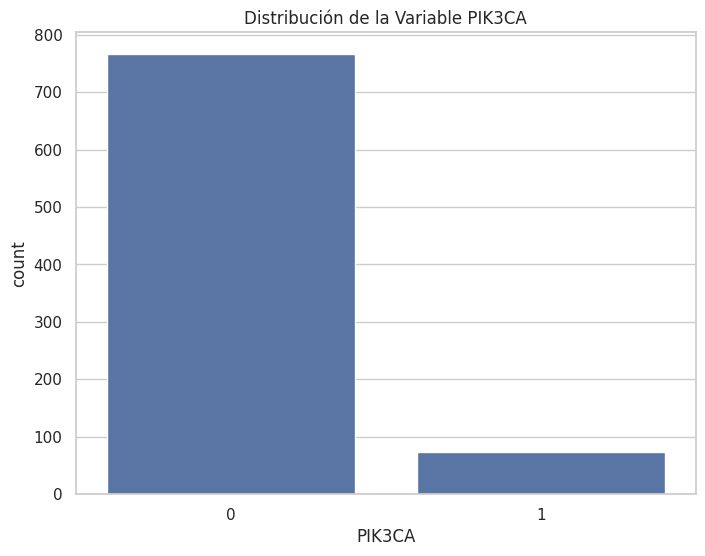

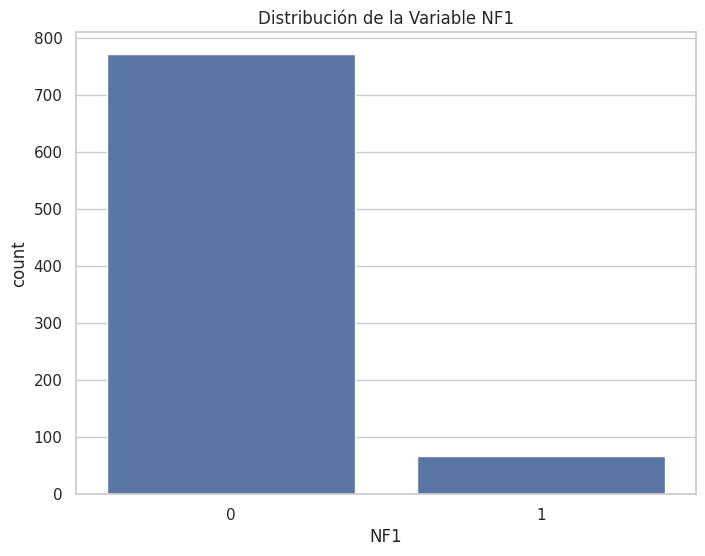

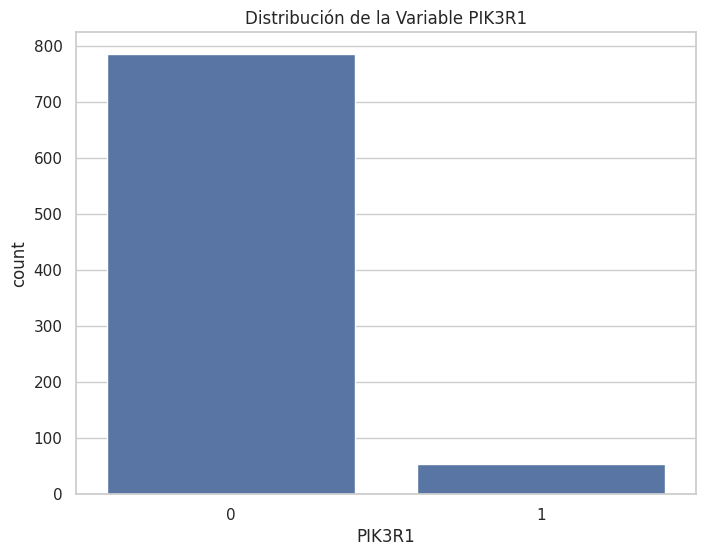

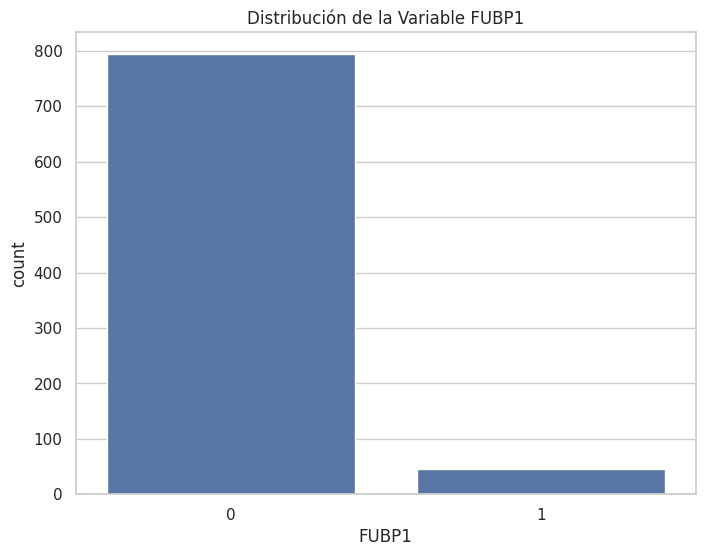

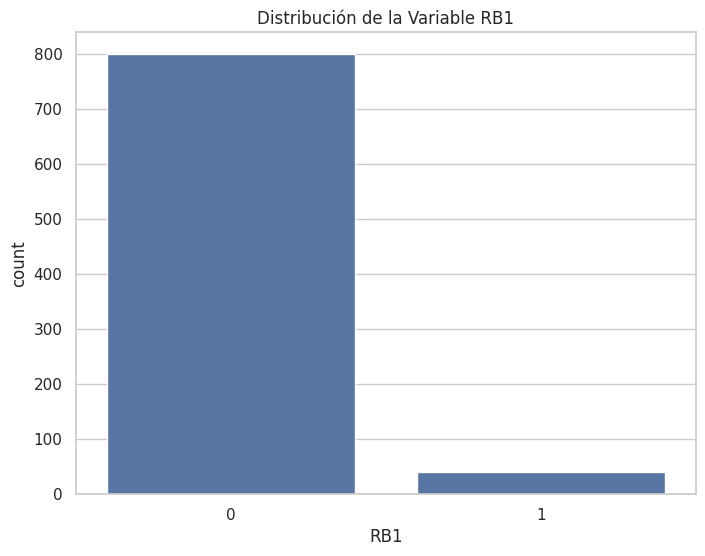

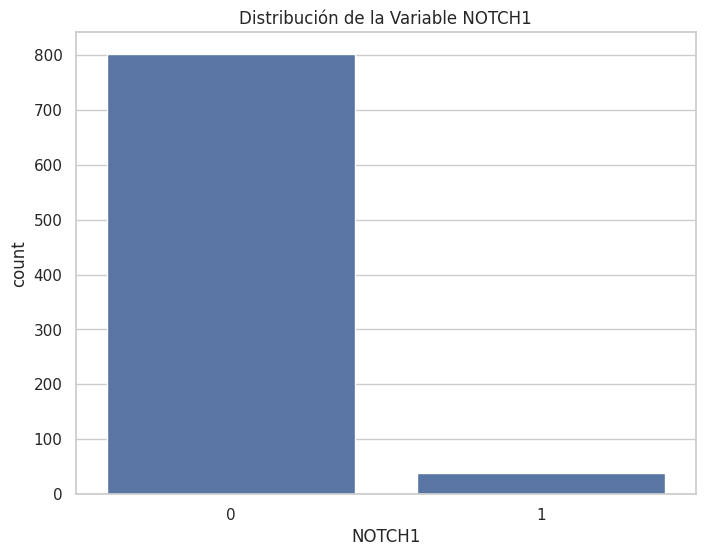

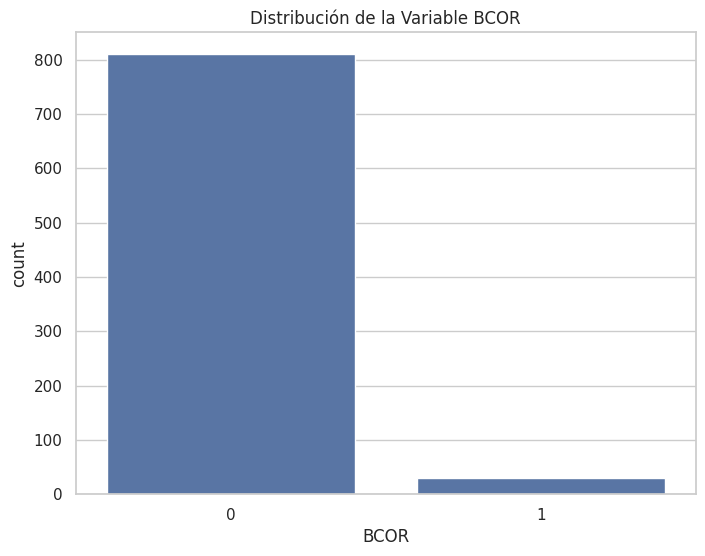

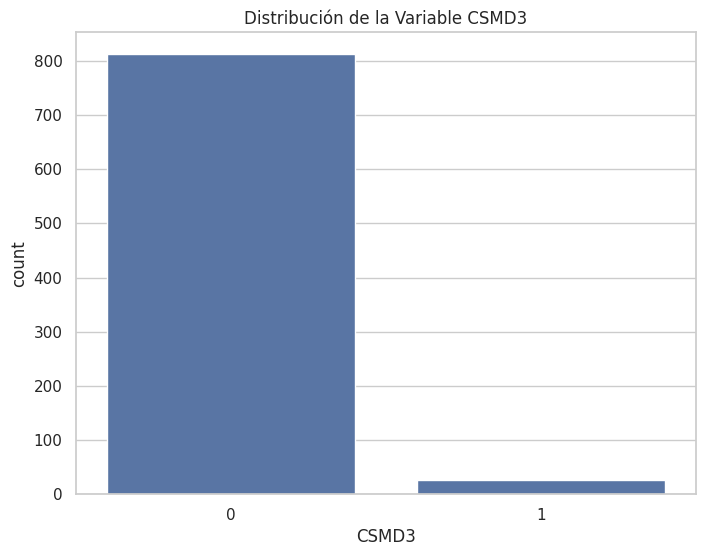

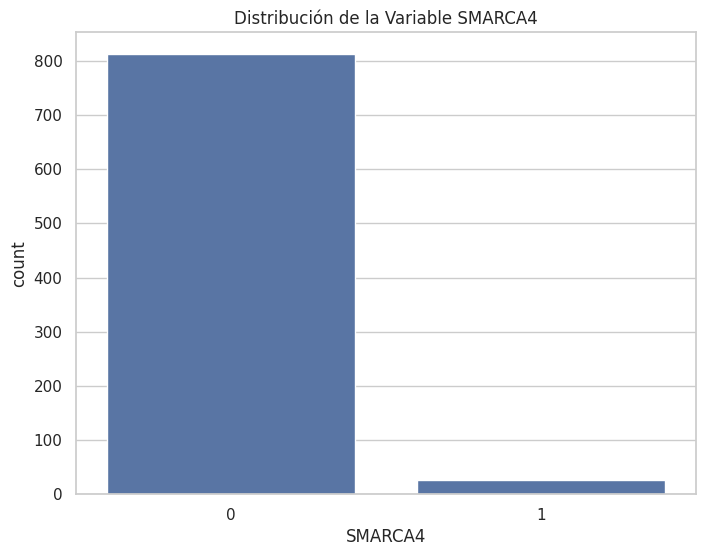

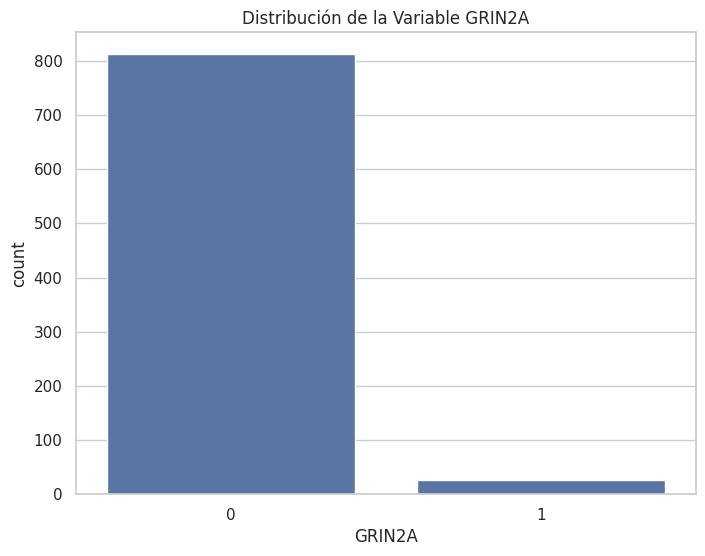

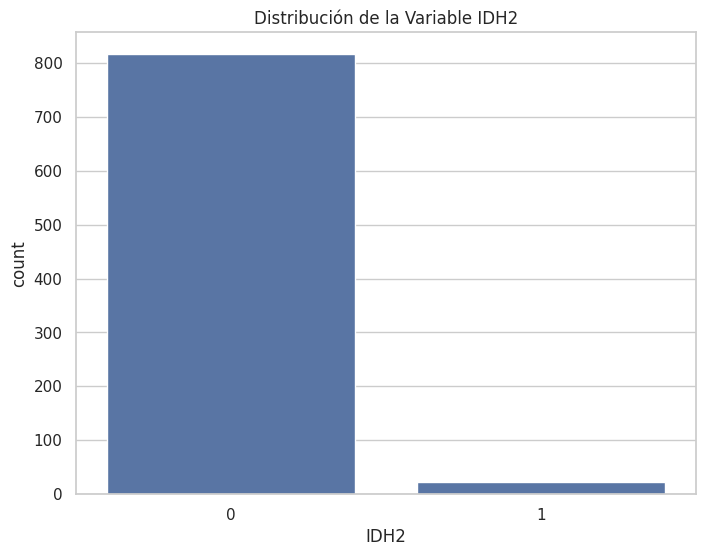

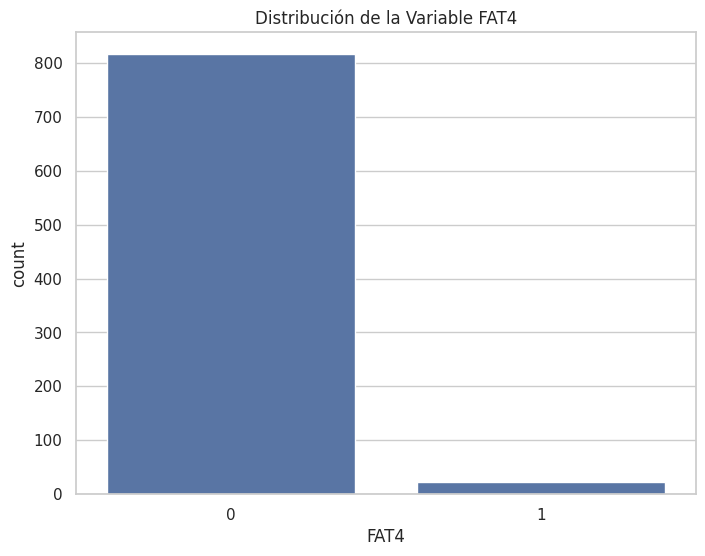

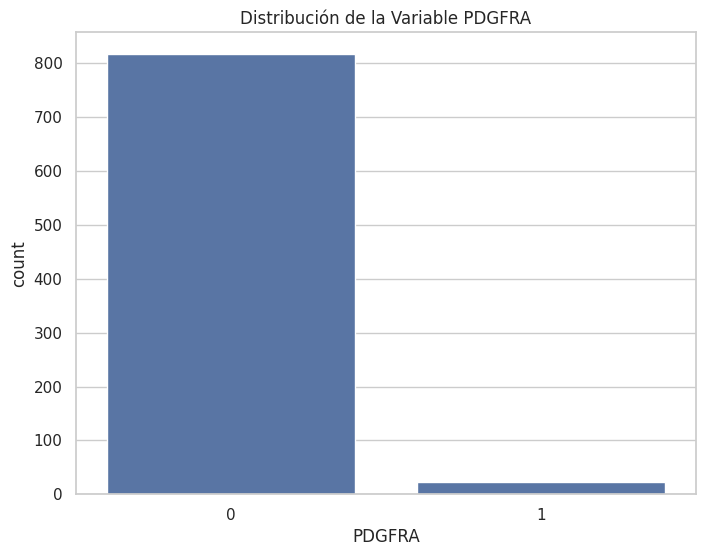

In [49]:

# Tablas de distribución para las variables restantes (0 y 1)
for col in data_TCGA.columns[4:]:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data_TCGA)
    plt.title(f'Distribución de la Variable {col}')
    plt.show()

Las gráficas de los genes indican que en la mayoría de las variables binarias relacionadas con mutaciones genéticas, la categoría 'NOT_MUTATED' (0) es más frecuente que la categoría 'MUTATED' (1). Esto indica que, dentro de la población de estudio, las mutaciones específicas son menos comunes en comparación con la ausencia de las mismas.

En la primera gráfica las categorías están casi igualmente representadas, implica que la incidencia de mutaciones versus no mutaciones para ese gen particular es más equitativa en tu muestra. Esto es un indicador de que el gen en cuestión tiene una mayor variabilidad en su estado de mutación en la población estudiada, o podría reflejar un factor relevante en la condición o enfermedad bajo estudio.

Para las demás variables, donde predomina el 'NOT_MUTATED', la interpretación podría ser que estas mutaciones son menos comunes o que no son tan cruciales para la condición de estudio.

 El desequilibrio en las clases puede influir en la modelización estadística o de aprendizaje automático, ya que los modelos pueden sesgarse hacia la clase más frecuente. Por ello, se deben considerar técnicas de balanceo de clases o ajustes en la evaluación de modelos para asegurarse de que el rendimiento del modelo sea adecuado y no esté simplemente prediciendo la clase mayoritaria.

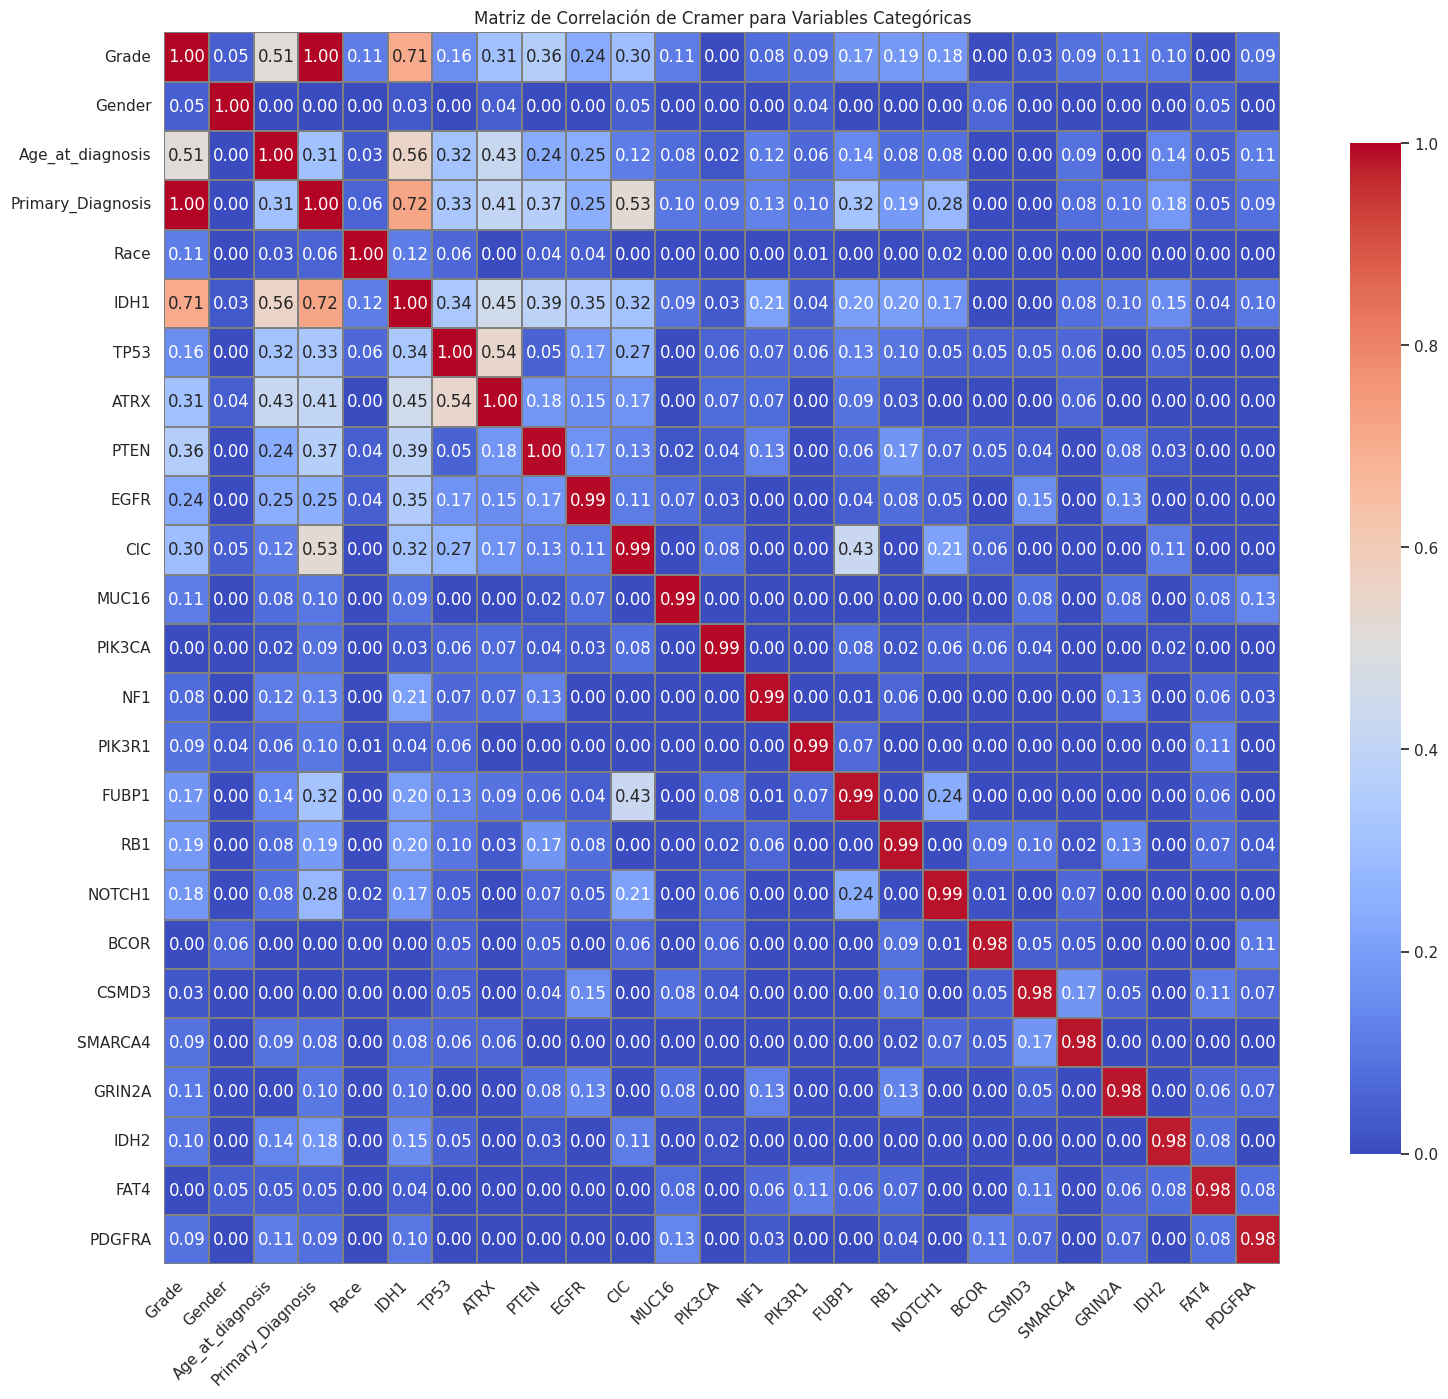

In [50]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Función para calcular el coeficiente de correlación de Cramer entre dos columnas categóricas
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Seleccionar columnas categóricas
columns = data_TCGA.select_dtypes(['category']).columns
corr_cramer = pd.DataFrame(index=columns, columns=columns)

# Calcular la matriz de correlación de Cramer
for col1 in columns:
    for col2 in columns:
        corr_cramer.loc[col1, col2] = cramers_v(data_TCGA[col1], data_TCGA[col2])

# Convertir los resultados a numéricos
corr_cramer = corr_cramer.astype(float)

# Ajustar el tamaño del gráfico para mejorar la visualización
plt.figure(figsize=(18, 16))  # Ajustar según sea necesario

# Visualizar la matriz de correlación con seaborn
sns.heatmap(corr_cramer, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .82}, linewidths=0.1, linecolor='gray')

# Mejorar las etiquetas para que sean más legibles
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title('Matriz de Correlación de Cramer para Variables Categóricas')

plt.show()


En un modelo de clasificación, es importante entender cómo se relacionan entre sí las variables que podrías usar para hacer tus predicciones. No se quiere que el modelo se confunda o dé demasiada importancia a información que, en realidad, es redundante. Por eso, miramos la matriz de correlación de Cramer, que nos ayuda a ver si hay variables que están, de alguna manera, dando la misma información.

La variable objetivo, 'Primary diagnosis', es la que queremos predecir. Las demás son las variables independientes, y lo que buscamos es ver cuán relacionadas están estas variables independientes con nuestra variable objetivo, pero también entre sí. Si dos variables independientes están muy relacionadas entre ellas, puede que una no aporte información adicional al modelo, y podríamos considerar eliminarla para simplificar las cosas.

Lo que está mostrando esta matriz es que algunas variables como 'IDH1' y 'TP53' tienen valores más altos en relación con 'Primary_Diagnosis', con valores de correlación de 0.72 y 0.52 respectivamente. Esto sugiere que estas variables podrían tener un papel significativo en la predicción del diagnóstico primario y deberían ser consideradas dentro del modelo de clasificación.

Por otro lado, hay variables como 'Gender' y 'Race', que tienen correlaciones más bajas con 'Primary_Diagnosis' (0.06 y 0.08, respectivamente). Estos valores bajos indican que estas características, por sí solas, no tienen una fuerte relación con el diagnóstico primario, y podríamos pensar que no van a ser muy útiles para predecirlo en nuestro modelo.

Otro punto interesante es observar las interrelaciones entre las variables independientes. Por ejemplo, 'IDH1' tiene una correlación bastante alta con 'TP53', lo que indica una relación notable entre estas dos variables. Aunque ambas parecen ser importantes para nuestro objetivo, este alto grado de asociación podría sugerir una redundancia de información.


> ##### Modelo

Para el modelo se escogió un clasificador Naive Bayes categórico de la librería scikit-learn. Se eligió por su eficacia para trabajar con las variables categóricas que surgen del análisis de los datos genómicos, algo clave en el proyecto TCGA, que busca entender las alteraciones genéticas en distintos tipos de cáncer.

El clasificador Naive Bayes trabaja bajo la idea de que las variables son independientes entre sí una vez que se conoce la clase. Esto hace más sencillo el proceso de aprendizaje y permite que el modelo funcione bien incluso con muchos datos, que es lo que suele pasar cuando se estudian genes. Aunque esta suposición no siempre es cierta, el modelo de Naive Bayes suele dar buenos resultados.

Para preparar los datos, se usa `OrdinalEncoder`, que convierte las categorías en números. Esto es necesario porque el modelo no entiende de texto, solo de números. Pero hay que tener en cuenta que al hacer esto estamos diciendo que hay un orden entre las categorías que quizá no exista.

Se separan los datos en partes para entrenar y para probar el modelo. Esto es para asegurarse de que el modelo no solo memorice los datos, sino que pueda hacer buenas predicciones con información nueva.

La precisión del modelo es de alrededor del 60%. Esto nos dice qué tan seguido el modelo acierta en sus predicciones. Pero como los datos de genes a menudo están desbalanceados, con más datos de un tipo que de otro, también es buena idea mirar otras medidas como la matriz de confusión o el recall, que nos pueden dar más pistas sobre cómo está funcionando el modelo realmente.

Usar Naive Bayes es un buen punto de partida para el proyecto TCGA porque nos ayuda a entender cómo se relacionan las variables entre sí y nos prepara para pasar a modelos más avanzados después.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

X = data_TCGA.drop('Primary_Diagnosis', axis=1)
y = data_TCGA['Primary_Diagnosis']  # Etiqueta objetivo

# Convertir categorías a valores numéricos
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Primero dividir los datos en entrenamiento+validación y test
X_temp, X_test, y_temp, y_test = train_test_split(X_encoded, y, test_size=10, random_state=42)

# Luego dividir los datos de entrenamiento+validación en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


# Crear y entrenar el clasificador Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Evaluar el clasificador
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.606425702811245


In [52]:


# Calcular la precisión
accuracy = accuracy_score(y_val, y_pred)

# Calcular el error de clasificación
error = 1 - accuracy

print(f'Error de clasificación: {error}')


Error de clasificación: 0.39357429718875503


In [53]:
# Realiza las predicciones con el modelo entrenado para los 10 pacientes de prueba
predicciones_nuevos_pacientes = model.predict(X_test)

# Muestra las predicciones y las clases reales para los primeros 10 pacientes
for i in range(len(X_test)):
    print(f"Paciente {i + 1}: Clase real - {y_test.iloc[i]}, Clase predicha - {predicciones_nuevos_pacientes[i]}")


Paciente 1: Clase real - Mixed glioma, Clase predicha - Astrocytoma, anaplastic
Paciente 2: Clase real - Glioblastoma, Clase predicha - Glioblastoma
Paciente 3: Clase real - Astrocytoma, anaplastic, Clase predicha - Astrocytoma, anaplastic
Paciente 4: Clase real - Mixed glioma, Clase predicha - Astrocytoma, anaplastic
Paciente 5: Clase real - Glioblastoma, Clase predicha - Glioblastoma
Paciente 6: Clase real - Glioblastoma, Clase predicha - Glioblastoma
Paciente 7: Clase real - Astrocytoma, anaplastic, Clase predicha - Astrocytoma, anaplastic
Paciente 8: Clase real - Oligodendroglioma, NOS, Clase predicha - Oligodendroglioma, NOS
Paciente 9: Clase real - Oligodendroglioma, NOS, Clase predicha - Mixed glioma
Paciente 10: Clase real - Glioblastoma, Clase predicha - Glioblastoma


> ##### Algunas soluciones alternativas a la poca precisión

In [54]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Gender', 'Race', 'PIK3CA', 'BCOR', 'CSMD3', 'SMARCA4', 'FAT4', 'PDGFRA']

# Eliminar las columnas del DataFrame
data_TCGA_reducido = data_TCGA.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame resultante para confirmar la eliminación
print(data_TCGA_reducido.head())


  Grade Age_at_diagnosis        Primary_Diagnosis IDH1 TP53 ATRX PTEN EGFR  \
0   LGG               Q2   Oligodendroglioma, NOS    1    0    0    0    0   
1   LGG               Q2             Mixed glioma    1    0    0    0    0   
2   LGG               Q1         Astrocytoma, NOS    1    1    1    0    0   
3   LGG               Q1  Astrocytoma, anaplastic    1    1    1    0    0   
4   LGG               Q1  Astrocytoma, anaplastic    1    1    1    0    0   

  CIC MUC16 NF1 PIK3R1 FUBP1 RB1 NOTCH1 GRIN2A IDH2  
0   0     0   0      0     1   0      0      0    0  
1   1     0   0      0     0   0      0      0    0  
2   0     0   0      0     0   0      0      0    0  
3   0     1   0      1     0   0      0      0    0  
4   0     0   0      0     0   0      0      0    0  


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

X = data_TCGA.drop('Primary_Diagnosis', axis=1)  # Características
y = data_TCGA['Primary_Diagnosis']  # Etiqueta objetivo

# Convertir categorías a valores numéricos
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Evaluar el clasificador
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5992063492063492


In [56]:


# Calcular la precisión
accuracy = accuracy_score(y_val, y_pred)

# Calcular el error de clasificación
error = 1 - accuracy

print(f'Error de clasificación: {error}')


Error de clasificación: 0.4007936507936508


In [57]:
# Realiza las predicciones con el modelo entrenado para los 10 pacientes de prueba
predicciones_nuevos_pacientes = model.predict(X_test)

# Muestra las predicciones y las clases reales para los primeros 10 pacientes
for i in range(len(X_test)):
    print(f"Paciente {i + 1}: Clase real - {y_test.iloc[i]}, Clase predicha - {predicciones_nuevos_pacientes[i]}")


Paciente 1: Clase real - Mixed glioma, Clase predicha - Oligodendroglioma, NOS
Paciente 2: Clase real - Glioblastoma, Clase predicha - Glioblastoma
Paciente 3: Clase real - Astrocytoma, anaplastic, Clase predicha - Astrocytoma, anaplastic
Paciente 4: Clase real - Mixed glioma, Clase predicha - Mixed glioma
Paciente 5: Clase real - Glioblastoma, Clase predicha - Glioblastoma
Paciente 6: Clase real - Glioblastoma, Clase predicha - Glioblastoma
Paciente 7: Clase real - Astrocytoma, anaplastic, Clase predicha - Glioblastoma
Paciente 8: Clase real - Oligodendroglioma, NOS, Clase predicha - Oligodendroglioma, NOS
Paciente 9: Clase real - Oligodendroglioma, NOS, Clase predicha - Astrocytoma, NOS
Paciente 10: Clase real - Glioblastoma, Clase predicha - Glioblastoma


Hemos decidido excluir las variables 'Gender', 'Race', 'PK3CA', 'BCOR', 'CSMD3', 'SMARCA4', 'FAT4' y 'PDGFRA' de nuestro modelo. Tras una evaluación meticulosa, determinamos que su presencia no mejoraba la precisión de nuestras predicciones. Con este paso, buscamos refinar nuestro modelo, manteniéndolo enfocado y eficiente, sin incluir información que no contribuya significativamente al objetivo de nuestro análisis.

> #### AGRUPAR VARIABLES (NO TIENE MUHO SENTIDO PERO FUE UNA PRUEBA)


In [58]:
import pandas as pd


# Crear una nueva variable para los grupos que deseas formar
def agrupar_clases(clase):
    if "Oligodendroglioma" in clase or "Mixed glioma" in clase:
        return "Gliomas"
    elif "Astrocytoma" in clase:
        return "Astrocitomas"
    elif "Glioblastoma" in clase:
        return "Glioblastoma"

# Aplicar la función para crear la nueva variable de grupos
data_TCGA['Primary_Diagnosis'] = data_TCGA['Primary_Diagnosis'].apply(agrupar_clases)

# Ahora, 'Grupo' contiene las clases agrupadas


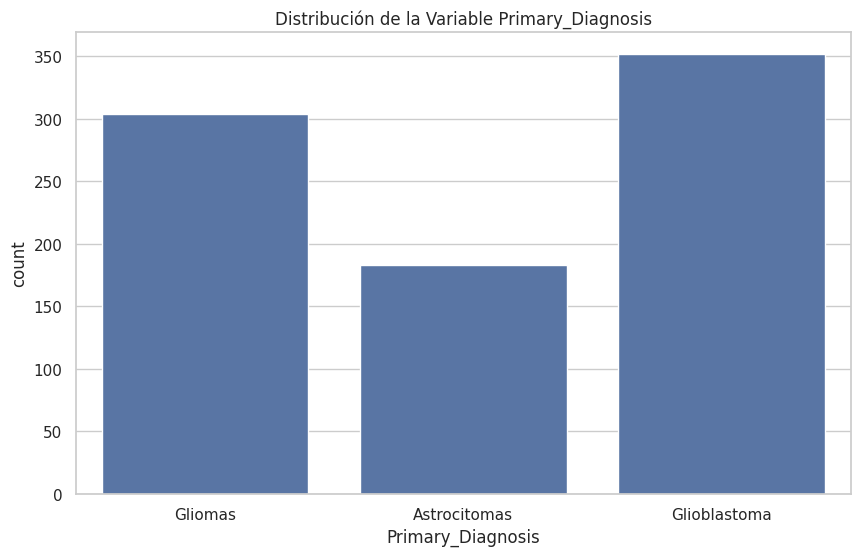

In [59]:
# Tabla de distribución para la variable 'Primary_Diagnosis' (6 clases)
plt.figure(figsize=(10, 6))
sns.countplot(x='Primary_Diagnosis', data=data_TCGA)
plt.title('Distribución de la Variable Primary_Diagnosis')
plt.show()


La gráfica indica una decisión para mejorar la precisión del modelo de clasificación, en ya que habia un desequilibrio en la variable objetivo 'Primary_Diagnosis'. Originalmente, ciertas clases tenían muchos más casos que otras, lo cual podría sesgar el modelo y limitar su habilidad para aprender a distinguir adecuadamente entre las diferentes clases de diagnósticos de cáncer.

Para abordar este problema, se ha procedido a combinar diagnósticos que tienen similitudes clínicas en grupos más amplios. Específicamente, 'Oligodendroglioma' y 'Mixed glioma' se han agrupado bajo 'Gliomas', mientras que diferentes tipos de 'Astrocytoma' forman ahora el grupo 'Astrocitomas'. Esta agrupación se basa en la similitud en la presentación clínica y las características patológicas de estas enfermedades. Al hacerlo, se busca que cada nueva categoría mantenga relevancia clínica, agrupando enfermedades que podrían compartir trayectorias de tratamiento y pronóstico similares.

La agrupación de clases similares también ayuda a balancear el número de casos en cada clase, lo que es crucial para el entrenamiento del modelo. Un modelo entrenado con un número más balanceado de casos por categoría tiene una mejor oportunidad de entender las características distintivas de cada una, en lugar de simplemente aprender a predecir la clase más común. Como resultado, la precisión del modelo ha mejorado significativamente, lo que indica que ahora puede predecir con mayor exactitud la categoría de diagnóstico de un nuevo caso de cáncer, basándose en los patrones aprendidos durante su entrenamiento.







In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

X = data_TCGA.drop('Primary_Diagnosis', axis=1)  # Características
y = data_TCGA['Primary_Diagnosis']  # Etiqueta objetivo

# Convertir categorías a valores numéricos
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Evaluar el clasificador
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7817460317460317


Aunque la agrupación de diagnósticos similares en categorías más amplias para equilibrar la cantidad de casos en cada clase puede mejorar la precisión del modelo, este método también puede presentar ciertas limitaciones que afectan su efectividad. Uno de los principales problemas es la potencial pérdida de información específica y granular de cada diagnóstico individual. Al agrupar diagnósticos como 'Oligodendroglioma' y 'Mixed glioma' bajo la categoría general de 'Gliomas', se pueden perder detalles únicos que son cruciales para tratamientos personalizados y diagnósticos precisos. Además, aunque los diagnósticos agrupados compartan similitudes clínicas, cada subtipo puede tener características particulares que podrían ser relevantes para el pronóstico y la respuesta al tratamiento. Este enfoque también presupone una homogeneidad dentro de las categorías que puede no existir, lo que podría llevar a conclusiones erróneas sobre la efectividad de los tratamientos o la gravedad de la enfermedad en casos individuales. Por lo tanto, aunque la agrupación ayuda a mejorar la precisión estadística del modelo, también podría comprometer su capacidad para hacer predicciones precisas y personalizadas en situaciones clínicas específicas.

In [61]:


# Calcular la precisión
accuracy = accuracy_score(y_val, y_pred)

# Calcular el error de clasificación
error = 1 - accuracy

print(f'Error de clasificación: {error}')


Error de clasificación: 0.21825396825396826


In [62]:
# Realiza las predicciones con el modelo entrenado para los 10 pacientes de prueba
predicciones_nuevos_pacientes = model.predict(X_test)

# Muestra las predicciones y las clases reales para los primeros 10 pacientes
for i in range(len(X_test)):
    print(f"Paciente {i + 1}: Clase real - {y_test.iloc[i]}, Clase predicha - {predicciones_nuevos_pacientes[i]}")


Paciente 1: Clase real - Mixed glioma, Clase predicha - Gliomas
Paciente 2: Clase real - Glioblastoma, Clase predicha - Glioblastoma
Paciente 3: Clase real - Astrocytoma, anaplastic, Clase predicha - Astrocitomas
Paciente 4: Clase real - Mixed glioma, Clase predicha - Astrocitomas
Paciente 5: Clase real - Glioblastoma, Clase predicha - Glioblastoma
Paciente 6: Clase real - Glioblastoma, Clase predicha - Glioblastoma
Paciente 7: Clase real - Astrocytoma, anaplastic, Clase predicha - Glioblastoma
Paciente 8: Clase real - Oligodendroglioma, NOS, Clase predicha - Gliomas
Paciente 9: Clase real - Oligodendroglioma, NOS, Clase predicha - Astrocitomas
Paciente 10: Clase real - Glioblastoma, Clase predicha - Glioblastoma


Como podemos observar nuestro modelo teniendo en cuenta las agrupaciones predice bien la mayoría de los datos

> ## Práctica 3 (Detección de malware)

En la Universidad Francisco de Vitoria se quieren trazas de comunicación de la red para encontrar distintos
malwares. Dicho clasificador funcionará mediante un set de entrenamiento donde se buscará un plano que
divida las diferentes clases dispuesta en un espacio n-dimensional dependiendo de sus características.
Para ello usaremos el dataset “Malware”. Elige el clasificador que más se adapte de entre los vistos en clase
y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1) Crea un clasificador, realiza al menos tres configuraciones y dibuja una tabla donde se muestre la
precisión con la que clasifican. ¿Cómo funcionaría si no usamos kernels? ¿Y al usar distintos
kernels? (1 punto)

2) Elige 10 imágenes que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas.
Usa para ello el modelo que mejor clasifique de los del punto anterior. Índica con que error o
acierto ha funcionado el clasificador. (1 punto)

> ### Bibliotecas

In [63]:
import glob
import pandas as pd
import zipfile
from google.colab import drive

import os
from PIL import Image
import random


from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

> ### Selección de los datos

El primer paso será importar los datos del dataset "Malware" y explorarlos

In [64]:
drive.mount('/content/drive')

archivo_zip = '/content/drive/MyDrive/Malware.zip'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Descomprimimos zip

extract_to_path = '/content/malware_dataset'

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)  # Extraer el contenido del zip en una carpeta


El objetivo será tener dos vectores: uno que contenga todas las imágenes y otro donde estén sus respectivas etiquetas. Las etiquetas de las imágenes serán el nombre de la carpeta en la que se encuentre dicha imagen.

Además, tambien queremos aleatorizar los datos para evitar posibles problemas y mejorar la generalización

In [66]:
ruta = '/content/malware_dataset/Malware'

# Listas para almacenar las imágenes y sus etiquetas
image_paths = []
labels = []

print(os.listdir(ruta))

# Recorrer todas las carpetas en el directorio del dataset
for label in os.listdir(ruta):
    label_path = os.path.join(ruta, label)

    # Verificar si es un directorio
    if os.path.isdir(label_path):
        print(f"Leyendo imágenes de la carpeta: {label_path}")

        # Recorrer todos los archivos dentro de la carpeta
        for file_name in os.listdir(label_path):
            file_path = os.path.join(label_path, file_name)

            # Verificar si es un archivo de imagen
            if os.path.isfile(file_path):
                # Verificar si es una imagen válida
                try:
                    img = Image.open(file_path)
                    img.verify()
                    image_paths.append(file_path)
                    labels.append(label)
                except (IOError, SyntaxError) as e:
                    print(f"Error al cargar la imagen {file_path}: {e}")

# Mezclamos las rutas de las imágenes y las etiquetas
combined = list(zip(image_paths, labels))
random.seed(42)
random.shuffle(combined)
image_paths, labels = zip(*combined)

print("Total de imágenes:", len(image_paths))
print("Total de etiquetas:", len(labels))


['Yuner.A', 'Fakerean', 'Lolyda.AA1', 'Agent.FYI']
Leyendo imágenes de la carpeta: /content/malware_dataset/Malware/Yuner.A
Leyendo imágenes de la carpeta: /content/malware_dataset/Malware/Fakerean
Leyendo imágenes de la carpeta: /content/malware_dataset/Malware/Lolyda.AA1
Leyendo imágenes de la carpeta: /content/malware_dataset/Malware/Agent.FYI
Total de imágenes: 465
Total de etiquetas: 465


Ahora, verificamos que las etiquetas estan bien asignadas con tres imágenes aleatorias

In [67]:
num_images = len(image_paths)

for _ in range(3):
    # Seleccionar un índice aleatorio dentro del rango de la lista de rutas de imágenes
    random_index = random.randint(0, num_images - 1)

    image_path = image_paths[random_index]
    label = labels[random_index]

    image = Image.open(image_path)

    # Imprimir la ruta de la imagen y su etiqueta
    print("Ruta de la imagen:", image_path)
    print("Etiqueta:", label)

    image.show()


Ruta de la imagen: /content/malware_dataset/Malware/Fakerean/01a2b66c9844017c02be1484fb618dbf.png
Etiqueta: Fakerean
Ruta de la imagen: /content/malware_dataset/Malware/Yuner.A/03dc2810c4db08bcec210fddf0eab3bf.png
Etiqueta: Yuner.A
Ruta de la imagen: /content/malware_dataset/Malware/Yuner.A/03baa60ba5520137411fa3bde3d82ddc.png
Etiqueta: Yuner.A


Las imágenes están con sus etiquetas correscondientes, sin embargo, nos damos cuenta de que el vector 'image_path' contiene las rutas de las imágenes. Buscamos transformar estas rutas a las propias imágenes, para ello hacemos lo siguiente:


In [68]:
# Creamos una lista para almacenar las imágenes
images = []

# Iteramos sobre cada ruta de imagen
for image_path in image_paths:
    # Cargamos la imagen usando PIL
    image = imread(image_path)
    # Agregamos la imagen a la lista de imágenes
    images.append(image)


Y comprobamos que hemos guardado las imágenes correctamente

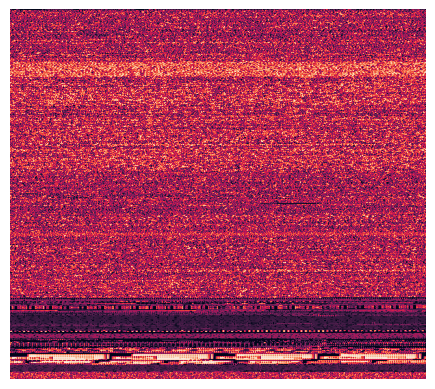

In [69]:
plt.imshow(images[0])
plt.axis('off')  # Desactiva los ejes
plt.show()

Volvemos a verificar que esta todo en orden representando 3 imágenes aleatorias con sus respectivas etiquetas

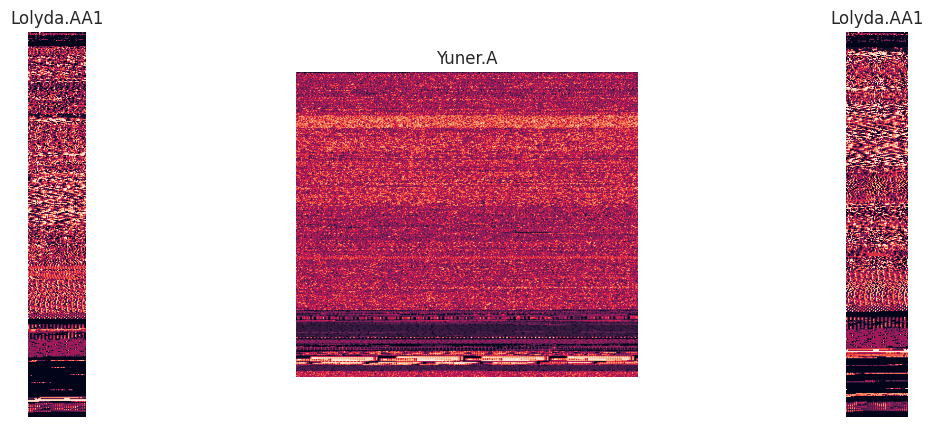

In [70]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5))

# Imprimir tres imágenes aleatorias junto con sus etiquetas en una fila horizontal
for i in range(3):
    # Seleccionar un índice aleatorio dentro del rango de la lista de imágenes
    random_index = random.randint(0, len(images) - 1)

    # Obtener la imagen y su etiqueta correspondiente
    image = images[random_index]
    label = labels[random_index]


    # Configurar el subplot
    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.title(label, fontsize=12)  # Agregar la etiqueta como título
    plt.axis('off')  # Desactiva los ejes

plt.show()


> ### Procesamiento de las imágenes

Ahora que tenemos los datos ordenamos como queremos, tenemos que transformar las imágenes para que tengan el formato correcto, de esta forma mejoramos los resultados de nuestra clasificación

A continuación, redimensionamos nuestras imágenes a un tamaño específico y las aplanamos para convertirlas en vectores unidimensionales, de esta forma, permitimos que se traten como datos numéricos y no como datos estructurados de imagen

In [71]:
# Definir el tamaño al que quieres redimensionar las imágenes
new_size = (64, 64)

# Lista para almacenar las imágenes redimensionadas y aplanadas
resized_flattened_images = []

# Iterar sobre cada imagen en la lista de imágenes originales
for image in images:
    # Redimensionar la imagen al nuevo tamaño
    resized_image = resize(image, new_size, anti_aliasing=True)
    # Aplanar el arreglo de la imagen
    flattened_image = resized_image.flatten()
    # Agregar la imagen aplanada a la lista
    resized_flattened_images.append(flattened_image)

# Convertir la lista de imágenes a un arreglo numpy
resized_flattened_images = np.array(resized_flattened_images)

# Verificar las dimensiones del arreglo resultante
print("Dimensiones del arreglo de imágenes redimensionadas y aplanadas:", resized_flattened_images.shape)


Dimensiones del arreglo de imágenes redimensionadas y aplanadas: (465, 4096)


Ahora tenemos 465 imágenes, donde cada imagen esta representada como un conjunto de 4096 valores numéricos

Seguidamente, representamos 5 imágenes aleatorias para verificar que hemos hecho todo bien

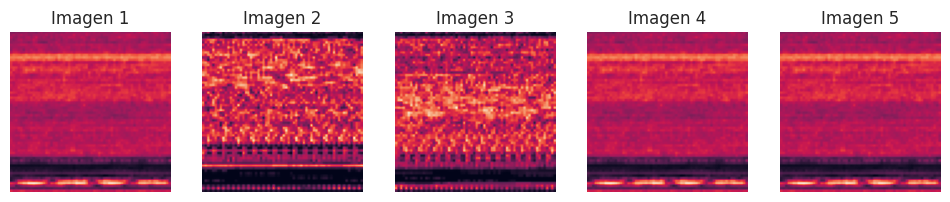

In [72]:
# Seleccionar algunas imágenes para visualizar
num_images_to_visualize = 5
selected_images = resized_flattened_images[:num_images_to_visualize]

# Visualizar las imágenes
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(12, 3))
for i, image in enumerate(selected_images):
    # Reshape del vector a su forma original antes de visualizar
    reshaped_image = image.reshape(new_size)
    axes[i].imshow(reshaped_image)
    axes[i].axis('off')  # Desactivar los ejes
    axes[i].set_title(f"Imagen {i+1}")

plt.show()


Finalmente, creamos dos nuevas listas donde guardaremos 10 imágenes con sus etiquetas que no usaremos en nuestros clasificadores, las usaremos posteriormente.

In [73]:
# Definir el número de nuevas imágenes a seleccionar
num_new_images = 10

# Listas para almacenar las nuevas imágenes y etiquetas
nuevas_images = []
nuevas_labels = []

# Copiar el conjunto original de imágenes y etiquetas para trabajar con copias
copied_images = np.copy(resized_flattened_images)
copied_labels = np.copy(labels)

# Selección aleatoria de nuevas imágenes
for _ in range(num_new_images):
    # Seleccionar un índice aleatorio dentro del rango de la lista de rutas de imágenes
    random_index = random.randint(0, len(copied_images) - 1)

    # Obtener la imagen y su etiqueta correspondiente
    nueva_image = copied_images[random_index]
    nueva_label = copied_labels[random_index]

    # Agregar la nueva imagen y su etiqueta a las listas correspondientes
    nuevas_images.append(nueva_image)
    nuevas_labels.append(nueva_label)

    # Eliminar la nueva imagen y su etiqueta del conjunto copiado
    copied_images = np.delete(copied_images, random_index, axis=0)
    copied_labels = np.delete(copied_labels, random_index)

# Convertir las listas de nuevas imágenes y etiquetas a arreglos numpy
nuevas_images = np.array(nuevas_images)
nuevas_labels = np.array(nuevas_labels)

# Verificar las dimensiones de los nuevos arreglos
print("Dimensiones de las nuevas imágenes:", nuevas_images.shape)
print("Dimensiones de las nuevas etiquetas:", nuevas_labels.shape)

# Imprimir las dimensiones de las imágenes y etiquetas originales
print("Dimensiones de las imágenes originales:", copied_images.shape)
print("Dimensiones de las etiquetas originales:", copied_labels.shape)


Dimensiones de las nuevas imágenes: (10, 4096)
Dimensiones de las nuevas etiquetas: (10,)
Dimensiones de las imágenes originales: (455, 4096)
Dimensiones de las etiquetas originales: (455,)


> ### 3.1 Clasificador

Crearemos un clasificador SVM, pues es muy efectivo para manejar conjuntos de datos complejos y no linealmente separables, que es justo lo que necesitamos para nuestras imágenes. Además, nos permite adaptar el modelo a características específicas de nuestros datos a través de parámetros como los kernels, lo que nos va a ayudar para mejorar el rendimiento y la capacidad de generalización.







Profundizaremos un poco más un poco mas:

  > **Support Vector Machines**

  El Support Vector Machines es un algoritmo de aprendizaje supervisado utilizado para resolver problemas de clasificación o regresión. Es conocido por su efectividad en la clasificación de datos complejos y la capacidad de manejar tanto datos linealmente separables como no lineales.

  El objetivo del SVM es encontrar un hiperplano en un espacio de características que separe óptimamente las clases. Para eso, los SVM buscan maximizar el margen, que es la distancia entre los puntos más cercanos de distintas clases al hiperplano de separación. Este margen se maximiza al encontrar los Support Vectors, que son los puntos más cercanos al hiperplano y que determinan su posición óptima.

  El hiperplano esta definido por la ecuación lineal:
  
  `w^T x + b = 0`

  donde:
  * w es el vector perpendicular al hiperplano (tiene relación con el ángulo)
  * x es un vector de datos
  * b la posición que ocupa el plano en el eje Y


  Cuando los datos son lineales se crean hiperplanos que dividen los datos en dos grupos según dos etiquetas. Si los datos no son separables pero tienen un alto número de características y requieren un espacio multidimensional para su representación, se utiliza un enfoque no lineal mediante el uso de funciones de kernel. En el caso en el que datos no pueden ser separados ni si quiera teniendo en cuenta los datos de entrada o inclusó después de transformaciones, se aplica una técnica llamada "soft margin"



  > **soft-margin**
    
  En la realidad no siempre es posible encontrar un hiperplano que separe perfectamente los datos. A diferencia de los SVM de "hard-margin", que no permiten ninguna violación del margen por parte de las instancias de entrenamiento, el modelo "soft-margin" permite que algunas instancias estén en el margen o incluso mal clasificadas. Esto hace que el modelo sea más flexible y capaz de manejar casos donde los datos no son completamente linealmente separables.

  Para permitir este margen blando, se introduce la variable de holgura  ξ en la ecuación del hiperplano. La ecuación queda así:
  
  `w^T x + b ≥ 1 - ξ`

  La variable de holgura se penaliza en la función objetivo de la SVM. La función objetivo busca minimizar el margen y la suma de las variables de holgura.

  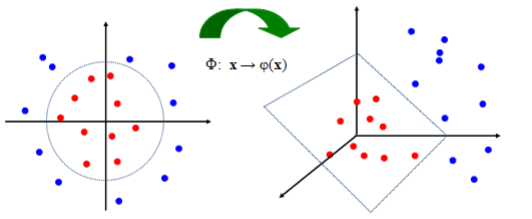

En esta imagen vemos como los datos en el espacio original no son linealmente separables, ya que no puedes trazar una línea recta que los divida sin errores. Sin embargo, al aplicar la función Φ y moverlos a un espacio de mayor dimensión, los puntos se pueden separar claramente por un hiperplano, lo que es representado por la línea recta en el segundo gráfico.

Esto es clave en el funcionamiento de los SVM con kernels, donde la idea es encontrar un hiperplano en un espacio de mayor dimensión que clasifique correctamente los datos, aunque estos no sean linealmente separables en el espacio de entrada original.





A continuación vamos a trabajar con tres kernels distintos para ver cual funciona mejor con nuestros datos.

Un kernel **lineal** nos va a indicar si nuestos datos se pueden separar de forma simple, es un punto de partida inicial y computacionalmente menos costoso. Ahora bien, si los malwares generan patrones más complejos, hemos elegido el kernel **polinomial de grado 3**, que es ideal para capturar relaciones cuadráticas y cúbicas entre las carácteríaticas. Esto nos permite ver si las clases tienen una separacion no lineal y más compleja que la lineal. El último kernel que hemos elegido es el **RBF**, el cual es potente para clasificadores donde las diferencias entre los tipos de malware son intricadas y no lineales ya que puede manejar fronteras de decisión altamente irregulares al proyectar los datos a un espacio de características de dimensión infinita, facilitando así la identificación de hiperplanos de separación en casos complejos.

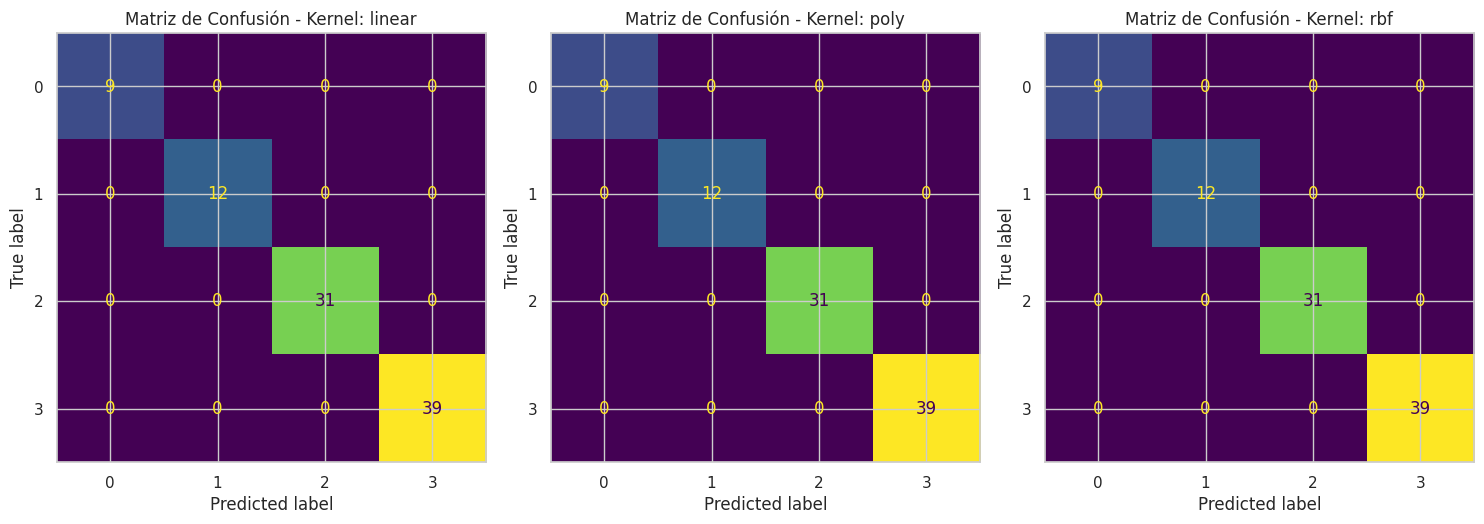

In [74]:
# Configuraciones del clasificador SVM
configurations = [
    {'kernel': 'linear'},
    {'kernel': 'poly', 'degree': 3},
    {'kernel': 'rbf'},
]

# Lista para almacenar los resultados de precisión
results = []

# Preparar los subplots
fig, axes = plt.subplots(nrows=1, ncols=len(configurations), figsize=(15, 5))  # Configura el tamaño según necesites

# Entrenar y evaluar SVM para cada configuración
for idx, config in enumerate(configurations):
    # Crear el clasificador SVM con la configuración dada
    clf = svm.SVC(**config)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(copied_images, copied_labels, test_size=0.2, random_state=42)

    # Entrenar el clasificador
    clf.fit(X_train, y_train)

    # Predecir las etiquetas para los datos de prueba
    y_pred = clf.predict(X_test)

    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)

    # Calcular la matriz de confusión
    conf_mat = confusion_matrix(y_test, y_pred)

    # Imprimir la matriz de confusión con ConfusionMatrixDisplay en el subplot correspondiente
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    disp.plot(ax=axes[idx], colorbar=False)  # Puedes omitir la barra de colores para más espacio
    axes[idx].set_title(f'Matriz de Confusión - Kernel: {config["kernel"]}')

    # Calcular el recall
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcular el puntaje F1
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Kernel': config['kernel'],
        'Precisión': accuracy,
        'Recall': recall,
        'Puntaje F1': f1,
    })

# Ajustar el layout para evitar la superposición de elementos
plt.tight_layout()
plt.show()  # Muestra todos los gráficos al mismo tiempo

# Crear un DataFrame de pandas con los resultados
results_df = pd.DataFrame(results)

# Mostrar el DataFrame
display(results_df.style.hide(axis='index'))


Los resultados muestran que todos los modelos SVM con las diferentes configuraciones de kernel han logrado una precisión perfecta de 1. Además las matrices de confución nos muestran que no se ha clasificado ninguna imagen erroneamente, cada clase a sido predicha correctamente sin falsos positivos o falsos negativos.

 A su vez, las métricas recall, que mide la capacidad de un modelo para identificar todos los casos relevantes dentro de un conjunto de datos, y el puntuaje F1, que combina la precisión y el recall para proporcionar una única métrica que refleja el equilibrio entre identificar correctamente los casos positivos y minimizar los errores de clasificación, tambien muestran valores perfectos de 1 para cada modelo.


<details>
  <summary><b>Recall y F1</b> (Clic para más información)</summary>

 Hemos decidido incorporar en nuestra evaluación del modelo el recall y el puntuaje F1 ya que son métricas importantes en la evaluación de modelos de clasificación. Especialmete, nos iban a interesar estas medidas en los casos en donde las clases estubieran desbalanceadas o donde el costo de los falsos negativos es significativamente alto.

### Recall
El **recall**, también conocido como sensibilidad, tasa de verdaderos positivos, o cobertura, responde a la pregunta: "¿Qué proporción de los casos positivos reales ha identificado correctamente el modelo?"

La fórmula para calcular el recall es:

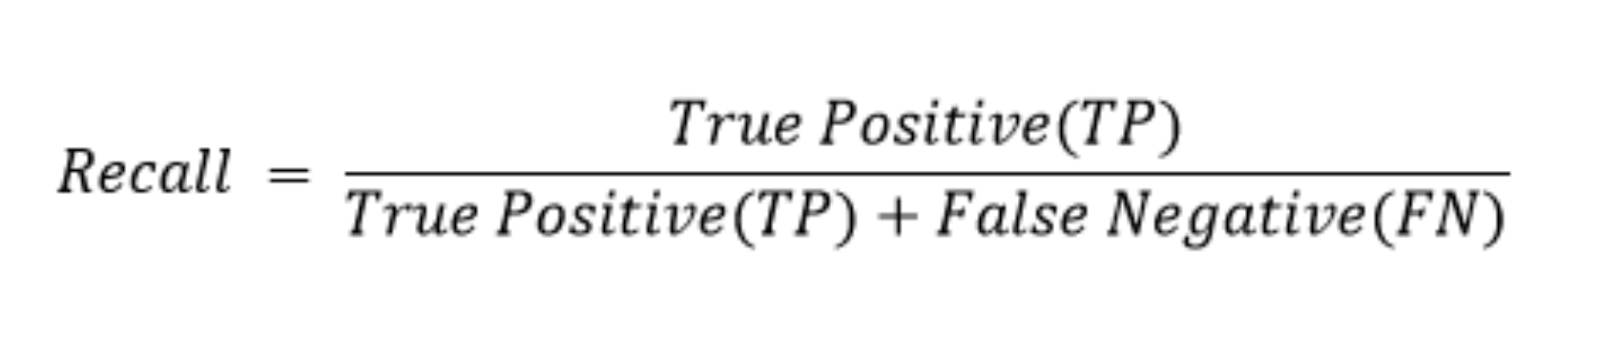\



Donde:
- **True Positive (TP)** son los casos donde el modelo predijo correctamente la clase positiva.
- **False Negative (FN)** son los casos donde el modelo predijo incorrectamente la clase negativa, siendo en realidad positiva.

Un recall alto es crucial en situaciones donde fallar en detectar un caso positivo tiene consecuencias graves.


### Puntaje F1
El **puntaje F1** es una métrica que combina el recall y la precisión (la proporción de predicciones positivas que son correctas) en un solo número mediante la media armónica de ambos. El puntaje F1 es útil porque toma en cuenta tanto los falsos positivos como los falsos negativos.

La fórmula para calcular el puntaje F1 es:

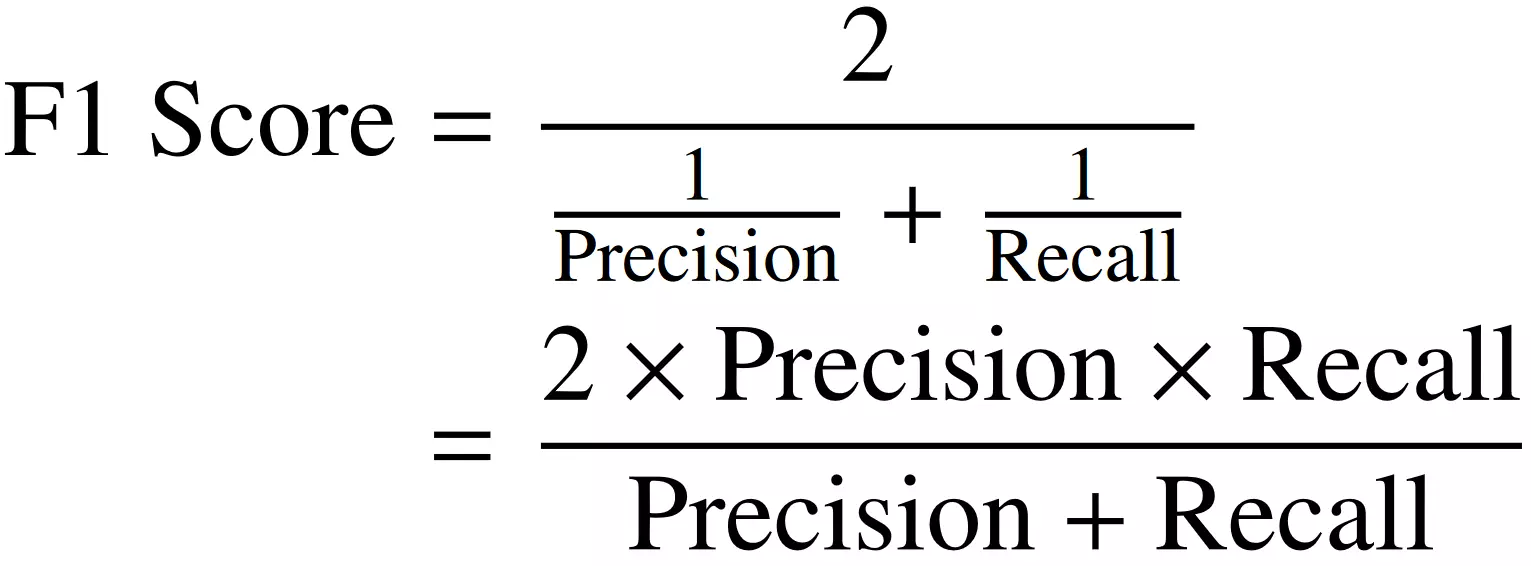


Donde:
- **Precisión** se calcula como:

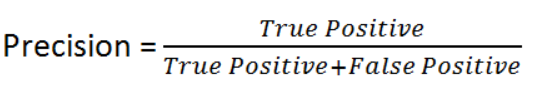


El puntaje F1 proporciona una idea de cómo el modelo se comporta en general sin dar preferencia ni a la precisión ni al recall. Un valor alto de F1 indica un buen equilibrio entre precisión y recall, lo cual es deseable en la mayoría de los casos.

Vamos a probar por último un kernel sigmoidal. Este kernel a veces es útil en cierto tipo de problemas no lineales, sin embargo es menos común para SVM ya que genera peores resultados en comparación con los kernels anteriores (RBF y polinomiales)

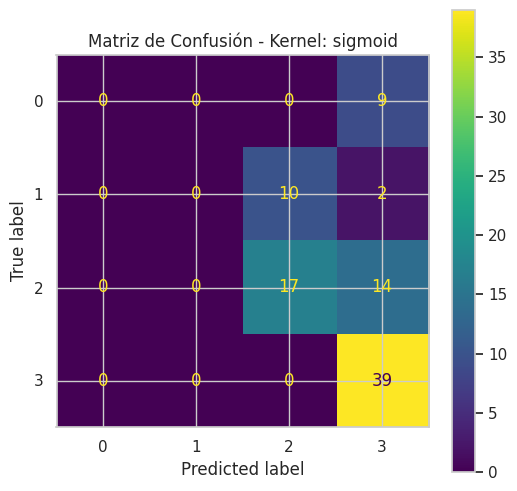

Kernel  Precisión    Recall  Puntaje F1
0  sigmoid   0.615385  0.615385    0.524246

In [75]:
# Configuraciones del clasificador SVM
configurations = [
    {'kernel': 'sigmoid'},  # Usando el kernel sigmoidal
]

# Lista para almacenar los resultados de precisión
results = []

# Entrenar y evaluar SVM para cada configuración
for config in configurations:
    # Crear el clasificador SVM con la configuración dada
    clf = svm.SVC(**config)

    # Entrenar el clasificador
    clf.fit(X_train, y_train)

    # Predecir las etiquetas para los datos de prueba
    y_pred = clf.predict(X_test)

    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)

    # Calcular la matriz de confusión
    conf_mat = confusion_matrix(y_test, y_pred)

    # Calcular el recall
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcular el puntaje F1
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Agregar el resultado a la lista de resultados
    results.append({
        'Kernel': config['kernel'],
        'Precisión': accuracy,
        'Recall': recall,
        'Puntaje F1': f1
    })

    # Gráfico de la matriz de confusión
    fig, ax = plt.subplots(figsize=(6, 6))  # Ajustar el tamaño según sea necesario
    ConfusionMatrixDisplay(conf_mat).plot(ax=ax)
    plt.title(f"Matriz de Confusión - Kernel: {config['kernel']}")
    plt.show()

# Crear un DataFrame de pandas con los resultados
results_df = pd.DataFrame(results)

# Mostrar los resultados en forma de tabla
display(results_df)


Como podemos observar la matriz de confusión nos indica que solo se han clasificado bien las instancias de la clase 3, las clases 0, 1 y 2 se han clasificado erroneamente como pertenecientes a la clase 3.

El rendimiento del clasificador es bastante bajo, como reflejan las métricas de precisión, recall y puntuaje F1. En particular, el recall y el puntaje F1 son bajos porque estos valores consideran tanto los verdaderos positivos como los falsos negativos, y en este caso, hay una cantidad significativa de falsos negativos en las clases 0, 1 y 2. Todo esto nos indica que el kernel sigmoidal no esta funcionando bien con la distribución de estos datos.

Esta gran diferencia que encontramos en el rendimiento entre el kernel sigmoidal y, por ejemplo, el kerner lineal nos muestra las diferencias fundamenteles en cómo cada kernel mapea los datos al espacio de características. Mientras que el kernel lineal parece haber encontrado un hiperplano que perfectamente separa las clases en los datos, el kernel sigmoidal, que introduce una no linealidad más compleja, no ha logrado encontrar una separación clara.

> ### 3.2 Nuevas imágenes

A continuación vamos a clasificar 10 nuevas imágenes, que no han sido usadas ni para entrenar ni para evaluar el modelo. Elegimos, por ejemplo, el kernel polinomial, aunque cualquiera de los tres primero kernels que hemos evaluado valdría, pues con todos hemos obtenido una precisión de 1.0.

In [76]:
# Configurar el clasificador SVM con kernel polinomial de grado 3
best_clf = SVC(kernel='poly', degree=3)

# Entrenar el clasificador con el conjunto de datos original
best_clf.fit(copied_images, copied_labels)

# Lista para almacenar las predicciones del clasificador
predictions = []

# Iterar sobre las nuevas imágenes y etiquetas
for image, label in zip(nuevas_images, nuevas_labels):
    # Redimensionar y aplanar la imagen
    resized_image = resize(image, new_size, anti_aliasing=True)
    flattened_image = resized_image.flatten()

    # Hacer la predicción utilizando el modelo SVM mejor clasificado
    prediction = best_clf.predict([flattened_image])
    predictions.append(prediction)

# Mostrar las predicciones junto con las etiquetas reales
for i, (prediction, label) in enumerate(zip(predictions, nuevas_labels)):
    print(f"Imagen {i+1}:")
    print(f"   Etiqueta real: {label}")
    print(f"   Predicción: {prediction}")
    print("")

# Calcular el porcentaje de aciertos
accuracy = accuracy_score(nuevas_labels, predictions)
print("Porcentaje de aciertos:", accuracy*100, '%')


Imagen 1:
   Etiqueta real: Fakerean
   Predicción: ['Fakerean']

Imagen 2:
   Etiqueta real: Lolyda.AA1
   Predicción: ['Lolyda.AA1']

Imagen 3:
   Etiqueta real: Yuner.A
   Predicción: ['Yuner.A']

Imagen 4:
   Etiqueta real: Yuner.A
   Predicción: ['Yuner.A']

Imagen 5:
   Etiqueta real: Lolyda.AA1
   Predicción: ['Lolyda.AA1']

Imagen 6:
   Etiqueta real: Agent.FYI
   Predicción: ['Agent.FYI']

Imagen 7:
   Etiqueta real: Lolyda.AA1
   Predicción: ['Lolyda.AA1']

Imagen 8:
   Etiqueta real: Fakerean
   Predicción: ['Fakerean']

Imagen 9:
   Etiqueta real: Lolyda.AA1
   Predicción: ['Lolyda.AA1']

Imagen 10:
   Etiqueta real: Fakerean
   Predicción: ['Fakerean']

Porcentaje de aciertos: 100.0 %


Hemos obtenido un 100% de aciertos, por lo que nuestro modelo ha clasificado bien todas las imágenes. Esto nos indica que el modelo esta generalizando bien, capturando patrones relevantes de los datos y por lo tanto, haciendo predicciones precidsas de nuevos datos, es decir, el modelo es efectivo para clasificar imágenes de este conjunto de datos

> ### Práctica 4 (Diagnóstico de cáncer con genes)

> ## Práctica 4 (Diagnóstico de cáncer con genes)

### **Análisis de la base de datos**

Descarga de la base de datos

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta del archivo CSV en Google Drive
ruta_archivo_drive = '/content/drive/MyDrive/genes.csv'

# Cargamos el archivo CSV en un DataFrame de pandas
data = pd.read_csv(ruta_archivo_drive)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gene1  Gene2  CancerPresent
0       4.3    3.9              1
1       2.5    6.3              0
2       5.7    3.9              1
3       6.1    6.2              0
4       7.4    3.4              1
...     ...    ...            ...
2995    5.0    6.5              1
2996    3.4    6.6              0
2997    2.7    6.5              0
2998    3.3    5.6              0
2999    4.6    8.2              0

[3000 rows x 3 columns]

**Limpieza de la Base de Datos:**

In [78]:
# Identificar valores faltantes en tus datos
valores_faltantes = data.isna().sum()

# Mostrar los valores faltantes por columna
print("Valores NA por columna:")
print(valores_faltantes)


Valores NA por columna:
Gene1            0
Gene2            0
CancerPresent    0
dtype: int64


Ninguna Variabe tiene valores NA, por lo tanto, podemos utilizar todas las observaciones.

**Estudio de los Outliers:**


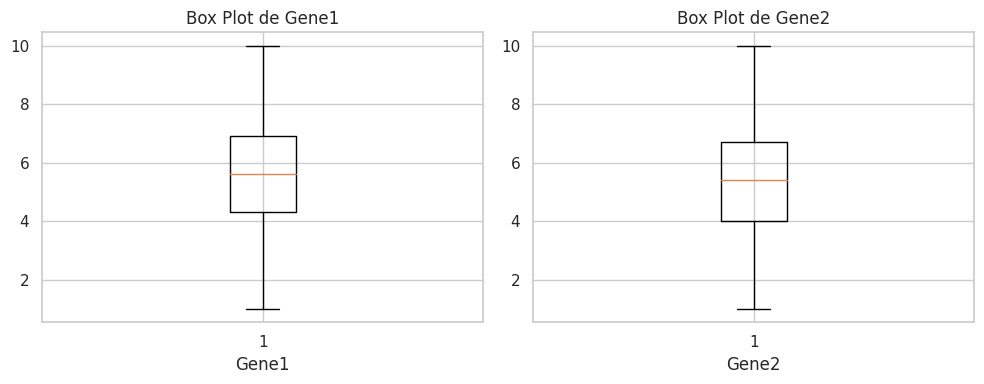

In [79]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots
plt.figure(figsize=(10, 4))

# Box plot de Gene1
plt.subplot(1, 2, 1)
plt.boxplot(data['Gene1'])
plt.title('Box Plot de Gene1')
plt.xlabel('Gene1')

# Box plot de Gene2
plt.subplot(1, 2, 2)
plt.boxplot(data['Gene2'])
plt.title('Box Plot de Gene2')
plt.xlabel('Gene2')

# Ajustar el diseño de los subplots para evitar solapamiento
plt.tight_layout()

# Mostrar los box plots
plt.show()

Podemos observar que no existen Outlayers, por lo que tampoco borraremos niguna observación en este caso.

**Estandarizar los datos:**

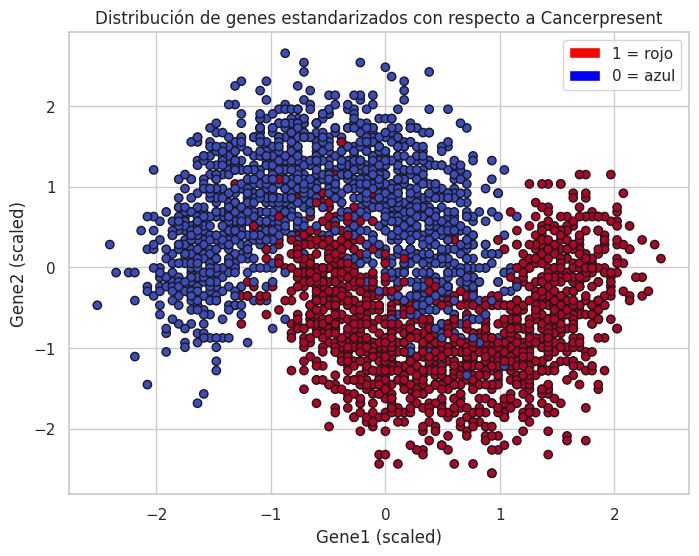

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler

# Extraemos las columnas gene1, gene2 y cancerpresent
gene1 = data['Gene1']
gene2 = data['Gene2']
cancer_present = data['CancerPresent']

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las columnas gene1 y gene2
gene1_scaled = scaler.fit_transform(gene1.values.reshape(-1, 1))
gene2_scaled = scaler.fit_transform(gene2.values.reshape(-1, 1))

# Crear un nuevo DataFrame con los datos estandarizados
data_scaled = pd.DataFrame({'Gene1': gene1_scaled.flatten(), 'Gene2': gene2_scaled.flatten(), 'CancerPresent': cancer_present})

# Creamos la gráfica
plt.figure(figsize=(8, 6))

# Dibujamos los puntos coloreados según el valor de cancerpresent
plt.scatter(data_scaled['Gene1'], data_scaled['Gene2'], c=data_scaled['CancerPresent'], cmap='coolwarm', edgecolor='k')

# Añadimos etiquetas y título
plt.xlabel('Gene1 (scaled)')
plt.ylabel('Gene2 (scaled)')
plt.title('Distribución de genes estandarizados con respecto a Cancerpresent')

# Creamos manualmente la leyenda
legend_elements = [Patch(facecolor='red', label='1 = rojo'),
                   Patch(facecolor='blue', label='0 = azul')]
plt.legend(handles=legend_elements)

# Mostramos la gráfica
plt.show()


Probamos a Transformar los datos para conseguir que el algoritmo KNN consiga una mayor precisión

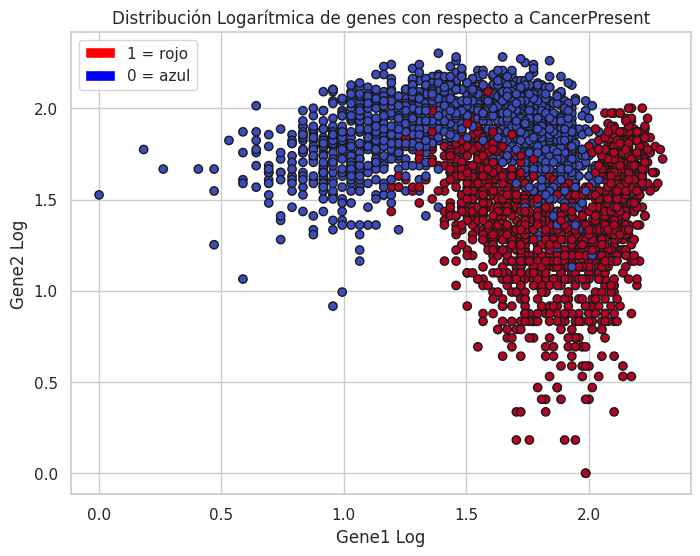

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Supongamos que ya tienes tus datos originales cargados en un DataFrame 'data'


# Aplicamos la transformación logarítmica a los datos
gene1_log = np.log(gene1)
gene2_log = np.log(gene2)

# Creamos un nuevo DataFrame con los datos transformados
data_log = pd.DataFrame({'Gene1_Log': gene1_log, 'Gene2_Log': gene2_log})

# Creamos la gráfica
plt.figure(figsize=(8, 6))

# Dibujamos los puntos coloreados según el valor de CancerPresent
plt.scatter(gene1_log, gene2_log, c=cancer_present, cmap='coolwarm', edgecolor='k')

# Añadimos etiquetas y título
plt.xlabel('Gene1 Log')
plt.ylabel('Gene2 Log')
plt.title('Distribución Logarítmica de genes con respecto a CancerPresent')

# Creamos manualmente la leyenda
legend_elements = [Patch(facecolor='red', label='1 = rojo'),
                   Patch(facecolor='blue', label='0 = azul')]
plt.legend(handles=legend_elements)

# Mostramos la gráfica
plt.show()


### 1)
**Haz todo el preprocesamiento para crear un set de entrenamiento, otro de validación y uno de test qué permita hacer un diagnóstico lo mas preciso posible aplicando las estrategias pertinentes. (0,5 puntos)**

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividimos los datos:
X = data_scaled[['Gene1', 'Gene2']] # X: Características
# X = data_log[['Gene1_Log', 'Gene2_Log']] # X: Características
y = data_scaled['CancerPresent'] # y: Etiquetas

# Paso 2: Dividir los datos en conjuntos de entrenamiento, validación y prueba
seed = 4
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)



# Imprimir las dimensiones de los conjuntos de datos
print("Dimensiones de los conjuntos de datos:")
print("Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de validación:", X_val.shape, y_val.shape)
print("Conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones de los conjuntos de datos:
Conjunto de entrenamiento: (1800, 2) (1800,)
Conjunto de validación: (600, 2) (600,)
Conjunto de prueba: (600, 2) (600,)


### 2)

**Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir la cercanía de esa nueva instancia con el resto. ¿Qué decisiones has tomado? ¿Por qué? (1 punto)**

 Para el valor del número de individuos, hemos decidido probar únicamente con **valores impares** para que no exista posibilad de empate entre categorías.

 En cuanto a medir las distancias, al tratarse de valores númericos hemos probado con 3 distancias:

 * **Euclidia:**

  $d_{\text{euclidiana}}(P_1, P_2) = \sqrt{\sum_{i=1}^{n} (x_{1i} - x_{2i})^2}$

 * **Manhattan:**

  $d_{\text{manhattan}}(P_1, P_2) = \sum_{i=1}^{n} |x_{1i} - x_{2i}|$

 * **Chebysev:**

  $d_{\text{chebyshev}}(P_1, P_2) = \max_{i=1}^{n} |x_{1i} - x_{2i}|$


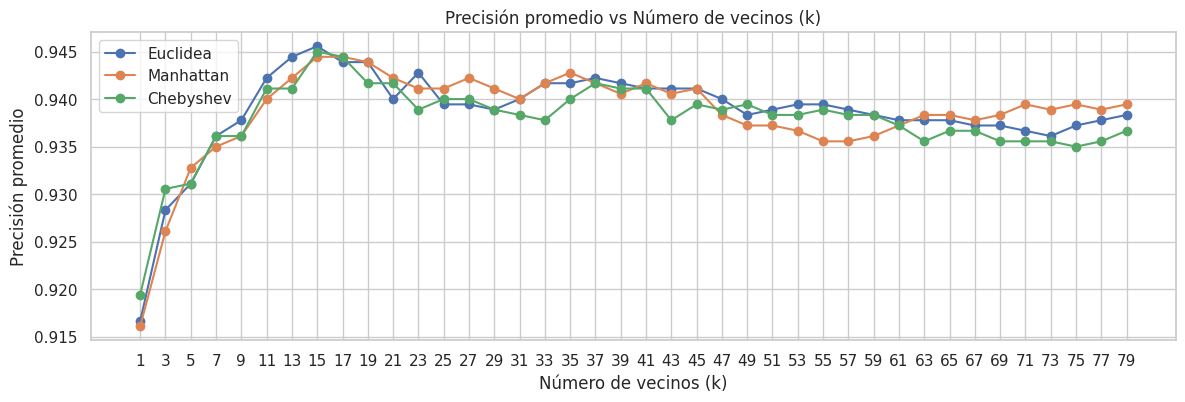

In [83]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Definir diferentes valores de k
k_values = [num for num in range(1, 80) if num % 2 != 0]


precisiones_euclidean = []
precisiones_manhattan = []
precisiones_Chebyshev = []

# Realizar la validación cruzada para cada valor de k y almacenar la precisión promedio
for k in k_values:
    # Para distancia euclidiana
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores_euclidean = cross_val_score(knn_euclidean, X_train, y_train, cv=5)
    precisiones_euclidean.append(np.mean(scores_euclidean))

    # Para distancia de Manhattan
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores_manhattan = cross_val_score(knn_manhattan, X_train, y_train, cv=5)
    precisiones_manhattan.append(np.mean(scores_manhattan))

    # Para distancia de Manhattan
    knn_Chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    scores_Chebyshev = cross_val_score(knn_Chebyshev, X_train, y_train, cv=5)
    precisiones_Chebyshev.append(np.mean(scores_Chebyshev))


# Graficar la precisión promedio en función de los valores de k para ambas
plt.figure(figsize=(14, 4))
plt.plot(k_values, precisiones_euclidean, marker='o', label='Euclidea')
plt.plot(k_values, precisiones_manhattan, marker='o', label='Manhattan')
plt.plot(k_values, precisiones_Chebyshev, marker='o', label='Chebyshev')
plt.title('Precisión promedio vs Número de vecinos (k)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión promedio')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

Observando la gráfica de los resultados, podemos comprobar que alcanzan la mejor precisión más o menos en **K = 15** y que la mejor mejor métrica para medir la distancia es la **Euclidea**.

### 3)
**Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la
clasificación. Dibuja los resultados que se obtienen con la mejor configuración y los distintos
hiperparametros del punto anterior para ver su evolución. (1 punto)**

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from tabulate import tabulate

# Definir diferentes valores de k y métricas de distancia
k_values = [11, 13, 15, 17, 19]
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Crear un diccionario para almacenar los resultados de validación cruzada
results_manhattan = {}
results_euclidean = {}
results_chebyshev = {}

# Realizar la validación cruzada para cada configuración
for k in k_values:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')

    scores_manhattan = cross_val_score(knn_manhattan, X_train, y_train, cv=5)
    scores_euclidean = cross_val_score(knn_euclidean, X_train, y_train, cv=5)
    scores_chebyshev = cross_val_score(knn_chebyshev, X_train, y_train, cv=5)

    results_manhattan[k] = np.mean(scores_manhattan)
    results_euclidean[k] = np.mean(scores_euclidean)
    results_chebyshev[k] = np.mean(scores_chebyshev)

# Crear una lista de tuplas para almacenar los resultados
table_data = [(k, results_manhattan[k], results_euclidean[k], results_chebyshev[k]) for k in k_values]

# Imprimir la tabla de resultados
print(tabulate(table_data, headers=["K", "Precisión (Manhattan)", "Precisión (Euclidean)", "Precisión (Chebyshev)"], tablefmt="fancy_grid"))

# Obtener la mejor configuración para cada métrica
best_k_manhattan = max(results_manhattan, key=results_manhattan.get)
best_score_manhattan = results_manhattan[best_k_manhattan]

best_k_euclidean = max(results_euclidean, key=results_euclidean.get)
best_score_euclidean = results_euclidean[best_k_euclidean]

best_k_chebyshev = max(results_chebyshev, key=results_chebyshev.get)
best_score_chebyshev = results_chebyshev[best_k_chebyshev]

# Comparar las mejores configuraciones de cada métrica y seleccionar la mejor
if best_score_manhattan >= best_score_euclidean and best_score_manhattan >= best_score_chebyshev:
    best_k = best_k_manhattan
    best_metric = 'manhattan'
    best_score = best_score_manhattan
elif best_score_euclidean >= best_score_manhattan and best_score_euclidean >= best_score_chebyshev:
    best_k = best_k_euclidean
    best_metric = 'euclidean'
    best_score = best_score_euclidean
else:
    best_k = best_k_chebyshev
    best_metric = 'chebyshev'
    best_score = best_score_chebyshev

print(f"\nMejor configuración global: K={best_k}, métrica={best_metric}, Precisión promedio: {best_score:.4f}")


╒═════╤═════════════════════════╤═════════════════════════╤═════════════════════════╕
│   K │   Precisión (Manhattan) │   Precisión (Euclidean) │   Precisión (Chebyshev) │
╞═════╪═════════════════════════╪═════════════════════════╪═════════════════════════╡
│  11 │                0.94     │                0.942222 │                0.941111 │
├─────┼─────────────────────────┼─────────────────────────┼─────────────────────────┤
│  13 │                0.942222 │                0.944444 │                0.941111 │
├─────┼─────────────────────────┼─────────────────────────┼─────────────────────────┤
│  15 │                0.944444 │                0.945556 │                0.945    │
├─────┼─────────────────────────┼─────────────────────────┼─────────────────────────┤
│  17 │                0.944444 │                0.943889 │                0.944444 │
├─────┼─────────────────────────┼─────────────────────────┼─────────────────────────┤
│  19 │                0.943889 │                0.943

### 4)
**Utiliza el clasificador para saber que ocurre con los datos de un del dataset de test “pacientes_test.csv” que obtendremos del dataset proporcionado. (0,5 puntos)**

In [85]:
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix


best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

best_knn.fit(X_train, y_train)

y_pred_val = best_knn.predict(X_val)

# Evaluar el rendimiento del clasificador en los datos de validación
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Precisión en los datos de validación:", accuracy_val)



Precisión en los datos de validación: 0.9233333333333333


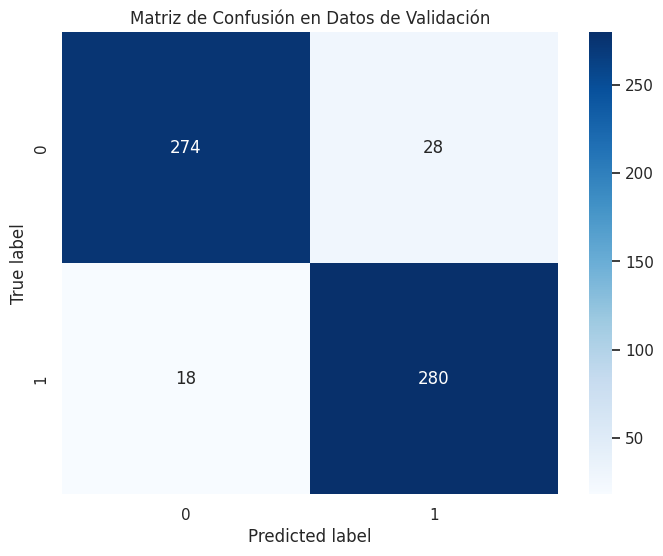

In [86]:
# Matriz de confusión
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Matriz de Confusión en Datos de Validación')
plt.show()


* **Verdaderos Positivos (TP): 274**. Casos en los que el modelo predijo correctamente que la clase es positiva
* **Falsos Negativos (FN): 28**. Casos en los que el modelo predijo incorrectamente que la clase es negativa
* **Falsos Positivos (FP): 18**. Casos en los que el modelo predijo incorrectamente que la clase es positiva
* **Verdaderos Negativos (TN): 280**. Casos en los que el modelo predijo correctamente que la clase es negativa

Observando los datos de la matriz de confusión el modelo tiene un buen rendimiento en la clasificación de los datos de validación, con una alta precisión en la mayoría de las clases.